In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
df_apoio = pd.read_excel('exp2014.xlsx')
dff_apoio = pd.read_excel('imp2014.xlsx')

df = df_apoio.copy()
df.drop(columns = ['Município','Descrição SH2', '2024 - Valor US$ FOB'],index = 1, inplace = True)
df['Mês'] = df['Mês'].str.split().str[1]

dff = dff_apoio.copy()
dff.drop(columns = ['Município','Descrição SH2', '2024 - Valor US$ FOB'],index = 1, inplace = True)
dff['Mês'] = dff['Mês'].str.split().str[1]


In [ ]:
global MESES
MESES = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}

In [ ]:
df_melted = dff.melt(id_vars=['Mês', 'Código SH2', 'País'], value_vars=list(dff.columns[3:]),
                    var_name='Ano', value_name='Valor US$ FOB')

df_melted['Ano'] = df_melted['Ano'].apply(lambda x: int(x.split()[0]))
df_pivoted = df_melted.pivot_table(index=['País', 'Mês', 'Ano'], columns='Código SH2', values='Valor US$ FOB', aggfunc='sum', fill_value=0)
df_pivoted.columns = [f'VOB SH2={col}' for col in df_pivoted.columns]
df_final = df_pivoted.reset_index()
df_final["Mês"] = df_final["Mês"].map(MESES)
df_final.rename(columns={'Ano': 'year', 'Mês': 'month'}, inplace=True)

In [ ]:
print('exp: '+ str(df['2023 - Valor US$ FOB'].sum()))
print('imp: '+ str(dff['2023 - Valor US$ FOB'].sum()))

exp: 1126629059
imp: 3349591252


In [ ]:
df_st_all = df_final.drop("País", axis=1).groupby(["year","month"]).sum().reset_index()
df_st_all["data"] = pd.to_datetime(df_st_all[["year", "month"]].assign(day=1))
df_st_all.set_index('data', inplace=True)
df_st_all

,year,month,VOB SECAO=I,VOB SECAO=II,VOB SECAO=III,VOB SECAO=IV,VOB SECAO=IX,VOB SECAO=V,VOB SECAO=VI,VOB SECAO=VII,...,VOB SECAO=XII,VOB SECAO=XIII,VOB SECAO=XIV,VOB SECAO=XV,VOB SECAO=XVI,VOB SECAO=XVII,VOB SECAO=XVIII,VOB SECAO=XX,VOB SECAO=XXI,VOB SECAO=XXII
data,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014,1,10000,734882,475204,14169079,45225,60078,8193582,6496705,...,541,242995,498,2998409,31685484,4792200,2030425,26308,0,5563058
2014-02-01,2014,2,0,10917838,475359,2618284,1127,61539,11122389,5341165,...,100,75539,0,9464065,46189544,4991182,2452555,50195,0,10101358
2014-03-01,2014,3,0,16902628,697996,2705243,2203,85799,13972629,6472460,...,0,92589,0,2751866,39199758,6127829,5519747,33484,0,7799123
2014-04-01,2014,4,24305,16747256,550773,2919074,3053,35533,10800681,7362129,...,1073,68154,0,2506204,41901292,4984047,1579766,13903,4490,11821321
2014-05-01,2014,5,24305,28925869,403569,2245221,122537,42884,11325166,6599727,...,0,106818,1462,2312109,48506782,5502228,5291591,28057,0,19251980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,2023,8,21791,139290,362389,3971981,2121,13689666,7429676,8482623,...,1304,117513,554,3741352,40386537,3730547,1788641,64256,0,0
2023-09-01,2023,9,0,323444,476004,1927549,1273,18722475,3852470,8458356,...,1147,141346,1607,2894630,30687722,3807149,4659387,72852,119643,0
2023-10-01,2023,10,60000,362798,603837,2980553,2467,19244459,4270050,11236491,...,444,251825,3374,3534329,39529916,3904986,6703926,87176,1300,0


In [ ]:
# Filtro do DataSet
start_date = '2015-01-01'
end_date = '2023-12-01'
df_filtered = df_st_all.loc[start_date:end_date]

In [ ]:
dates = df_filtered.index
months = dates.month # Store all months
dates = dates[(months == 7) | (months == 1)] # Filter dates
end_date = pd.to_datetime(end_date)

dates = dates.append(pd.DatetimeIndex([end_date]))
dates


DatetimeIndex(['2015-01-01', '2015-07-01', '2016-01-01', '2016-07-01',
               '2017-01-01', '2017-07-01', '2018-01-01', '2018-07-01',
               '2019-01-01', '2019-07-01', '2020-01-01', '2020-07-01',
               '2021-01-01', '2021-07-01', '2022-01-01', '2022-07-01',
               '2023-01-01', '2023-07-01', '2023-12-01'],
              dtype='datetime64[ns]', freq=None)

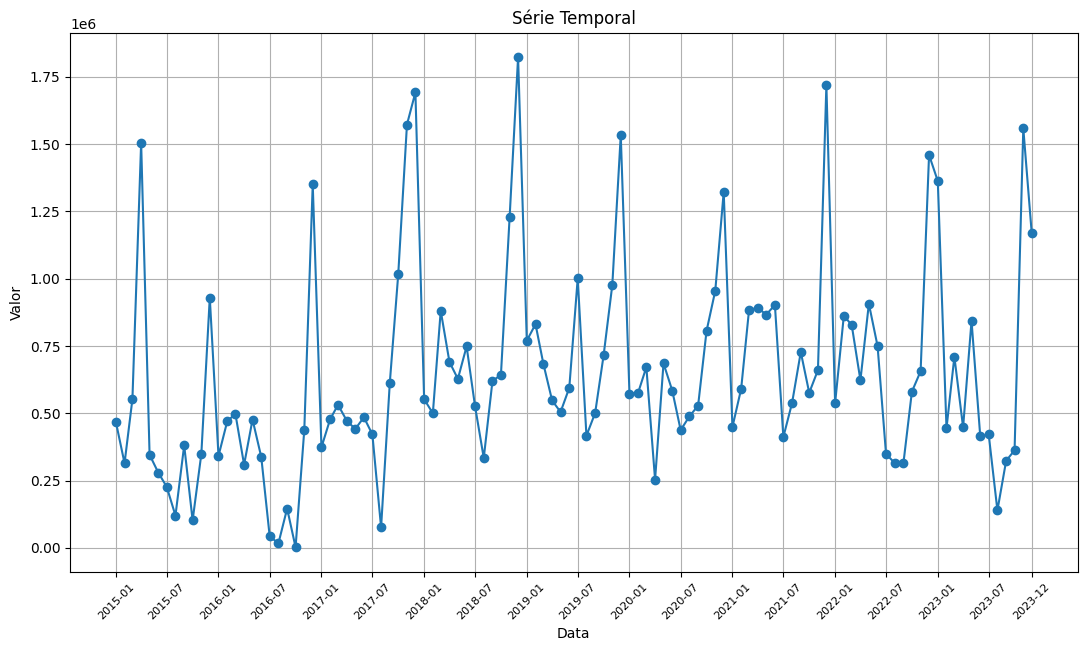

In [ ]:
plt.figure(figsize=(13, 7))
plt.plot(df_filtered.index, df_filtered['VOB SECAO=II'], marker='o')

# Definindo os xticks no meio do ano (julho)
xticks = pd.date_range(start=start_date, end=end_date, freq='AS-JUL')
plt.xticks(dates, rotation=45, fontsize=8)

# Formatando os xticklabels para mostrar apenas o ano
plt.gca().set_xticklabels([tick.strftime('%Y-%m') for tick in dates])

plt.title('Série Temporal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

In [ ]:
df

,Mês,País,Código Seção,Código SH2,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,2016 - Valor US$ FOB,2015 - Valor US$ FOB,2014 - Valor US$ FOB
0,Janeiro,China,XI,52,0,979,895348,2635553,695049,0,0,579027,0,0
2,Março,Estados Unidos,V,27,8597875,3614252,2450201,1617857,780478,0,0,0,0,0
3,Janeiro,Estados Unidos,XVI,85,5044342,1809316,3060859,2493709,6278481,5782543,3905852,760423,443001,2161946
4,Maio,Estados Unidos,XVI,85,4169127,1998259,843573,1177696,9190496,4200663,4526093,6300873,2879738,3655088
5,Janeiro,Estados Unidos,V,27,4462166,2502437,1322685,765494,2395288,0,793,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19320,Fevereiro,Egito,IX,45,0,0,0,0,0,0,0,0,0,1
19321,Janeiro,El Salvador,XV,76,0,0,0,0,0,0,0,0,0,1
19322,Junho,Panamá,XIV,71,0,0,0,0,0,0,0,0,0,1
19323,Janeiro,China,X,49,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final

,País,month,year,VOB SECAO=I,VOB SECAO=II,VOB SECAO=III,VOB SECAO=IV,VOB SECAO=IX,VOB SECAO=V,VOB SECAO=VI,...,VOB SECAO=XIII,VOB SECAO=XIV,VOB SECAO=XV,VOB SECAO=XVI,VOB SECAO=XVII,VOB SECAO=XVIII,VOB SECAO=XX,VOB SECAO=XXI,VOB SECAO=XXII,Data
0,Afeganistão,2,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2014-02-01
1,Afeganistão,2,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015-02-01
2,Afeganistão,2,2016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-02-01
3,Afeganistão,2,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017-02-01
4,Afeganistão,2,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16325,Índia,9,2019,0,0,0,0,0,0,260751,...,3644,0,5899,71839,918,125487,0,0,0,2019-09-01
16326,Índia,9,2020,0,0,0,0,0,0,118756,...,0,0,33384,1272599,0,70787,0,0,0,2020-09-01
16327,Índia,9,2021,0,0,0,0,0,0,950671,...,0,0,6882,434859,6,5,0,0,0,2021-09-01
16328,Índia,9,2022,0,0,0,0,0,0,415401,...,0,0,2680,393684,5685,40496,0,0,0,2022-09-01


In [ ]:
df_final.drop("País",axis=1).groupby(["Ano","Mês"]).sum()

VOB SECAO=I  VOB SECAO=II  VOB SECAO=III  VOB SECAO=IV  \
Ano  Mês                                                                 
2014 Abril            24305      16747256         550773       2919074   
     Agosto           24305       6215742         510766       2409930   
     Dezembro        157500      11250438         625986       6500316   
     Fevereiro            0      10917838         475359       2618284   
     Janeiro          10000        734882         475204      14169079   
...                     ...           ...            ...           ...   
2023 Maio             32296        843296         360648       2309966   
     Março            22354        709992         193766       2624961   
     Novembro          7591       1558356         406178       3204089   
     Outubro          60000        362798         603837       2980553   
     Setembro             0        323444         476004       1927549   

                VOB SECAO=IX  VOB SECAO=V  VOB SECAO=VI  VOB SECAO=VII  \
Ano  Mês                                                                 
2014 Abril              3053        35533      10800681        7362129   
     Agosto            16811        82054      22295898        4846287   
     Dezembro           1751        26217       9417850        6506739   
     Fevereiro          1127        61539      11122389        5341165   
     Janeiro           45225        60078       8193582        6496705   
...                      ...          ...           ...            ...   
2023 Maio               8973     16472467      15683498       12555342   
     Março              1325     19557450      13483204       12391042   
     Novembro           1090     18216042       4490068       10261574   
     Outubro            2467     19244459       4270050       11236491   
     Setembro           1273     18722475       3852470        8458356   

                VOB SECAO=VIII  VOB SECAO=X  ...  VOB SECAO=XII  \
Ano  Mês                                     ...                  
2014 Abril                  39        41595  ...           1073   
     Agosto                  0        42492  ...            170   
     Dezembro             2983        26439  ...              0   
     Fevereiro            2200        59361  ...            100   
     Janeiro                 0        26638  ...            541   
...                        ...          ...  ...            ...   
2023 Maio                20300       125449  ...            118   
     Março               28230        24833  ...          34206   
     Novembro             7889        61702  ...              0   
     Outubro                74        63377  ...            444   
     Setembro               78       166104  ...           1147   

                VOB SECAO=XIII  VOB SECAO=XIV  VOB SECAO=XV  VOB SECAO=XVI  \
Ano  Mês                                                                     
2014 Abril               68154              0       2506204       41901292   
     Agosto             105805              0       3750126       44756896   
     Dezembro           179780              0       3630928       39484293   
     Fevereiro           75539              0       9464065       46189544   
     Janeiro            242995            498       2998409       31685484   
...                        ...            ...           ...            ...   
2023 Maio               119907             69       2912112       51269740   
     Março              159088              0       3618653       40251392   
     Novembro           144688           1035       3202245       45608512   
     Outubro            251825           3374       3534329       39529916   
     Setembro           141346           1607       2894630       30687722   

                VOB SECAO=XVII  VOB SECAO=XVIII  VOB SECAO=XX  VOB SECAO=XXI  \
Ano  Mês                                                                       
2014 Abril             4984047          157

In [ ]:
df_sec = df.drop(columns=["País","Código SH2"], axis=1)

In [ ]:
df_sec.groupby(['Código Seção','Mês']).sum()

2023 - Valor US$ FOB  2022 - Valor US$ FOB  \
Código Seção Mês                                                     
I            Abril                      2754                  6751   
             Agosto                    21791                     0   
             Dezembro                  50458                 38538   
             Fevereiro                 17875                  5479   
             Janeiro                   70921                  8871   
...                                      ...                   ...   
XXII         Maio                          0                     0   
             Março                         0                     0   
             Novembro                      0                     0   
             Outubro                       0                     0   
             Setembro                      0                     0   

                        2021 - Valor US$ FOB  2020 - Valor US$ FOB  \
Código Seção Mês                                                     
I            Abril                      8864                 15000   
             Agosto                    12875                301561   
             Dezembro                 162364                 13068   
             Fevereiro                161656                 69472   
             Janeiro                    4475                155431   
...                                      ...                   ...   
XXII         Maio                          0                     0   
             Março                         0                     0   
             Novembro                      0                     0   
             Outubro                       0                     0   
             Setembro                      0                     0   

                        2019 - Valor US$ FOB  2018 - Valor US$ FOB  \
Código Seção Mês                                                     
I            Abril                     91430                 83641   
             Agosto                    83612                 69500   
             Dezembro                  12085                 95659   
             Fevereiro                164640                 65791   
             Janeiro                   10079                 65717   
...                                      ...                   ...   
XXII         Maio                          0               9275087   
             Março                         0              10328681   
             Novembro                      0                     0   
             Outubro                       0               2215365   
             Setembro                      0               7134799   

                        2017 - Valor US$ FOB  2016 - Valor US$ FOB  \
Código Seção Mês                                                     
I            Abril                     59500                 27805   
             Agosto                    65500                     0   
             Dezembro                  10682                 29750   
             Fevereiro                 59500                 27805   
             Janeiro                       0                     0   
...                                      ...                   ...   
XXII         Maio                    7251547               4639507   
             Março                   6839642               4240464   
             Novembro               12136545               7383330   
             Outubro                11981587               8962240   
             Setembro                6522751              17935843   

                        2015 - Valor US$ FOB  2014 - Valor US$ FOB  
Código Seção Mês                                                    
I            Abril                     30000                 24305  
             Agosto                    48750                 24305  
             Dezembro                  55000                157500  
             Fevereiro             

In [ ]:
df_country = df[["País","2023 - Valor US$ FOB"]].groupby("País").sum().reset_index()

In [ ]:
df_country["Country"] = ['Afghanistan', 'Albania', 'Germany', 'Angola',
 'Netherlands Antilles', 'Antigua and Barbuda', 'Argentina', 'Algeria',
 'Aruba', 'Saudi Arabia', 'Australia', 'Bahamas', 'Bangladesh',
 'Barbados', 'Bahrain', 'Belarus', 'Belize', 'Benin', 'Bermudas',
 'Bolivia', 'Bonaire, Saint Eustatius and Saba', 'Botswana', 'Brazil',
 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Belgium',
 'Bosnia-Herzegovina', 'Cape Verde', 'Cameroon', 'Cambodia',
 'Canada', 'Canary Islands', 'Qatar', 'Chad', 'Chile', 'China',
 'Cyprus', 'Colombia', 'Congo', 'Congo, Democratic Republic',
 'North Korea', 'South Korea', 'Costa Rica',
 'Ivory Coast', 'Coveite (Kuweit)', 'Croatia', 'Cuba',
 'Curaçao', 'Denmark', 'Djibouti', 'Dominica', 'Egypt',
 'El Salvador', 'United Arab Emirates', 'Ecuador', 'Slovakia',
 'Slovenia', 'Spain', 'United States', 'Estonia', 'Ethiopia',
 'Falkland (Malvinas)', 'Philippines', 'Finland', 'France', 'Gabon',
 'Ghana', 'Georgia', 'Granada', 'Greece', 'Guadeloupe', 'Guatemala',
 'Guyana', 'French Guiana', 'Guinea', 'Guinea-Bissau', 'Gambia',
 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Indonesia', 'Iraq',
 'Ireland', 'Iran', 'Iceland', 'Israel', 'Italy', 'Yemen',
 'Jamaica', 'Japan', 'Jordan', 'Latvia', 'Lithuania',
 'Luxembourg', 'Lebanon', 'Libya', 'Macau', 'Macedonia',
 'Madagascar', 'Malavi', 'Mali', 'Malta', 'Malaysia', 'Morocco',
 'Marshall, Islands', 'Martinique', 'Mauritania', 'Mauritius',
 'Myanmar', 'Micronesia', 'Moldova', 'Mongolia', 'Mozambique',
 'Mexico', 'Monaco', 'Namibia', 'Nepal', 'Nicaragua', 'Nigeria',
 'Norfolk Island', 'Norway', 'New Caledonia', 'New Zealand',
 'Niger', 'Oman', 'Pacific Islands (USA)', 'Panama',
 'Papua New Guinea', 'Pakistan', 'Paraguay',
 'Netherlands (Netherlands)', 'Peru', 'French Polynesia', 'Poland',
 'Puerto Rico', 'Portugal', 'Provision of Ships and Aircraft',
 'Kenya', 'United Kingdom', 'Central African Republic',
 'Dominican Republic', 'Reunion', 'Romania', 'Rwanda', 'Russia',
 'American Samoa', 'Saint Lucia', 'Seychelles', 'Senegal',
 'Sierra Leone', 'Singapore', 'Somalia', 'Sri Lanka', 'Sudan',
 'Suriname', 'Sweden', 'Switzerland', 'Saint Barthelemy',
 'Saint Martin, Island of (French part)', 'Saint Pierre and Miquelon',
 'São Tomé and Príncipe', 'Saint Vincent and the Grenadines', 'Serbia',
 'Thailand', 'Taiwan (Formosa)', 'Tanzania', 'Czech Republic',
 'French Southern Lands', 'East Timor', 'Togo', 'Tonga',
 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Ukraine', 'Uganda',
 'Uruguay', 'Uzbekistan', 'Vatican', 'Venezuela', 'Vietnam',
 'Virgin Islands (British)', 'Zimbabwe', 'Zambia',
 'South Africa', 'Austria', 'India']

In [ ]:
df_country.drop('País', axis=1, inplace=True)

In [ ]:
df_country

,2023 - Valor US$ FOB,Country
0,0,Afghanistan
1,85770,Albania
2,96260047,Germany
3,2450864,Angola
4,0,Netherlands Antilles
...,...,...
185,0,Zimbabwe
186,15288,Zambia
187,8818546,South Africa
188,1772853,Austria


In [ ]:
df[df['País']=='Bonaire, Saint Eustatius e Saba']

,Mês,País,Código Seção,Código SH2,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,2016 - Valor US$ FOB,2015 - Valor US$ FOB,2014 - Valor US$ FOB
981,Janeiro,"Bonaire, Saint Eustatius e Saba",IV,23,0,0,0,0,0,0,0,0,0,0
4441,Outubro,"Bonaire, Saint Eustatius e Saba",IV,23,23276,0,0,0,0,0,0,0,0,0
4444,Agosto,"Bonaire, Saint Eustatius e Saba",IV,23,23200,0,0,0,0,0,0,0,0,0
4445,Junho,"Bonaire, Saint Eustatius e Saba",IV,23,23078,0,0,0,0,0,0,0,0,0
11367,Junho,"Bonaire, Saint Eustatius e Saba",XV,82,0,0,9484,0,0,0,0,0,0,0
12944,Dezembro,"Bonaire, Saint Eustatius e Saba",XVI,85,0,0,0,4079,0,0,0,0,0,0
12983,Junho,"Bonaire, Saint Eustatius e Saba",XVIII,90,0,0,0,2876,0,0,0,0,0,0
14017,Julho,"Bonaire, Saint Eustatius e Saba",XVI,85,0,0,0,0,7130,0,0,0,0,0
14700,Janeiro,"Bonaire, Saint Eustatius e Saba",VI,29,0,0,0,0,28,0,0,0,0,0


# New Section

In [ ]:
exp_total = df.iloc[:,4:].sum().values
exp_total = list(exp_total)
exp_total.reverse()

In [ ]:
anos = []
for x in df.iloc[:,4:].columns:
  anos.append(x.split(' ')[0])

anos.reverse()

In [ ]:
anos

['2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

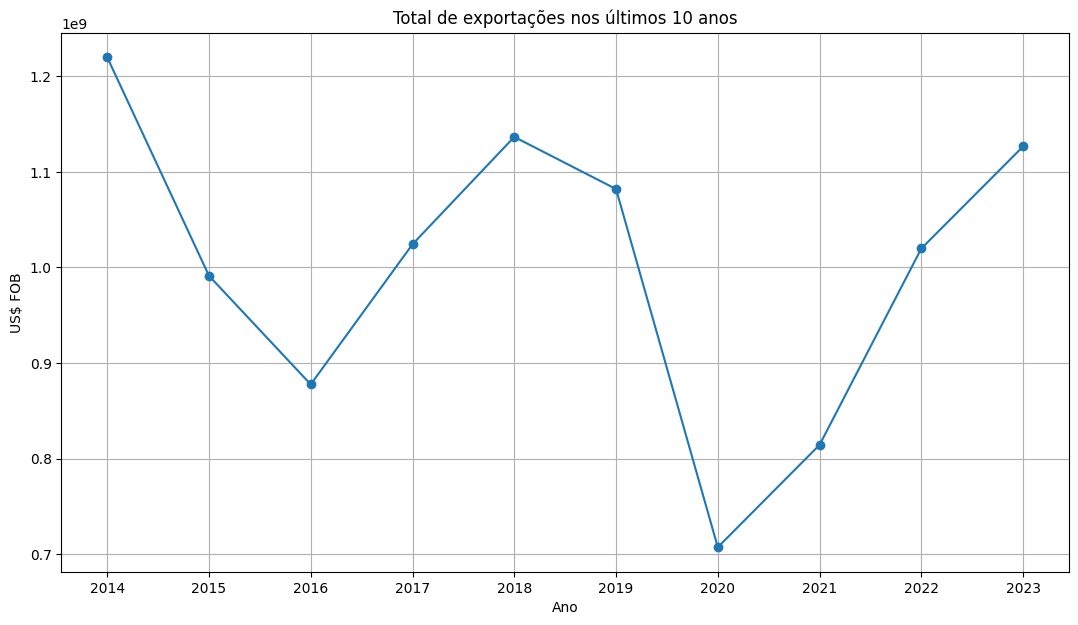

In [ ]:
df_plot = pd.DataFrame({
    'ano': anos,
    'exp': exp_total
})
plt.figure(figsize=(13, 7))
plt.plot('ano', 'exp', data=df_plot, linestyle='-', marker='o')

plt.grid()
plt.xlabel("Ano")
plt.ylabel("US$ FOB")
plt.title("Total de exportações nos últimos 10 anos")
plt.show()

In [ ]:
df.iloc[:,4:].sum()

2023 - Valor US$ FOB    1126629059
2022 - Valor US$ FOB    1019859689
2021 - Valor US$ FOB     814360632
2020 - Valor US$ FOB     707270271
2019 - Valor US$ FOB    1082081471
2018 - Valor US$ FOB    1136620077
2017 - Valor US$ FOB    1024271028
2016 - Valor US$ FOB     877628680
2015 - Valor US$ FOB     991319129
2014 - Valor US$ FOB    1220005027
dtype: int64

In [ ]:
top_country = dff[['País','2023 - Valor US$ FOB']].groupby('País').sum().reset_index()
top_country

,País,2023 - Valor US$ FOB
0,Afeganistão,0
1,"Aland, Ilhas",649
2,Albânia,3375
3,Alemanha,241996705
4,Andorra,333
...,...,...
168,"Virgens, Ilhas (Britânicas)",0
169,Zimbábue,0
170,África do Sul,3893755
171,Áustria,18034104


In [ ]:
top_country10 = top_country.sort_values('2023 - Valor US$ FOB', ascending=False).iloc[:10,:]
top_country10

,País,2023 - Valor US$ FOB
60,Estados Unidos,267265026
6,Argentina,146938756
2,Alemanha,96260047
116,México,77401543
39,Colômbia,37987484
132,Paraguai,34071338
138,Portugal,33735929
37,China,32659322
36,Chile,27924001
22,Brasil,27904476


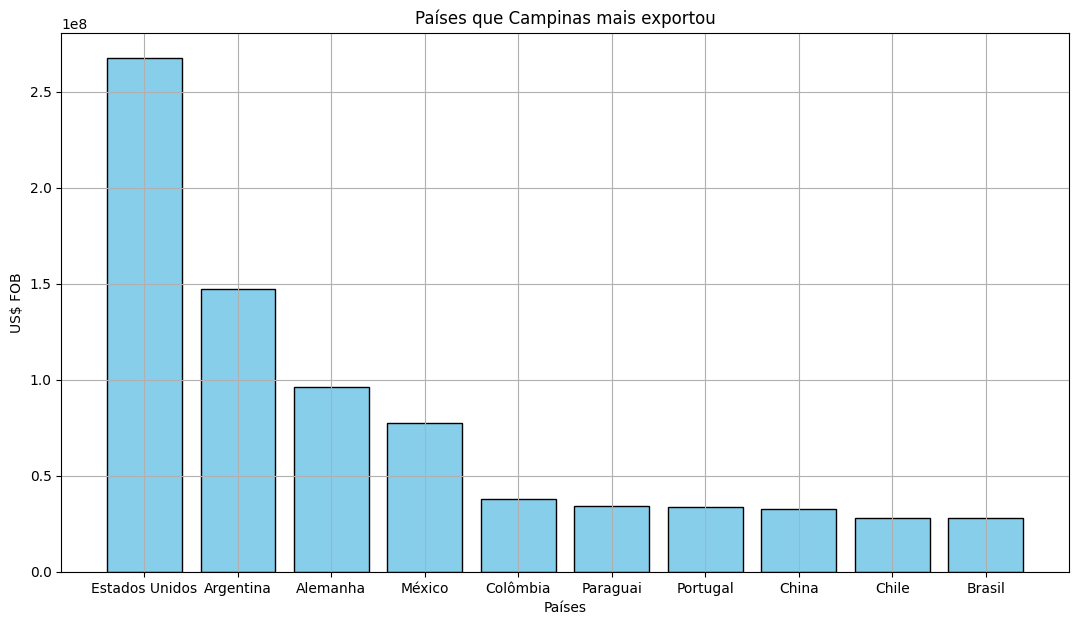

10000000

In [ ]:
plt.figure(figsize=(13, 7))
plt.bar(top_country10['País'], top_country10['2023 - Valor US$ FOB'], color='skyblue', edgecolor='black')

# Add labels and title
plt.grid()
plt.xlabel('Países')
plt.ylabel('US$ FOB')
plt.title('Países que Campinas mais exportou')

# Show the plot
plt.show()
10_000_000

In [ ]:
interval = [-float('inf'), 0]
for i in range(1,10):
  interval.append(10**i)
interval.append(float('inf'))
interval

[-inf,
 0,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000,
 inf]

In [ ]:
intervalos = [-float('inf'), 0, 1_000, 100_000, 1_000_000, float('inf')]
tipologias = ['0',
              '1 até 10',
              '11 até 100',
              '101 até 1.000',
              '1.001 até 10.000',
              '10.001 até 100.000',
              '100.001 até 1.000.000',
              '1.000.001 até 10.000.000',
              '10.000.001 até 100.000.000',
              '100.000.001 até 1.000.000.000',
              'mais de 1.000.000.000']

In [ ]:
top_country['Faixa'] = pd.cut(top_country['2023 - Valor US$ FOB'], bins=interval, labels=tipologias, right=True)
#top_country.loc[(top_country['Faixa'] == '[0-10)') & (top_country['2023 - Valor US$ FOB'] == 0), 'Faixa'] = '0'

In [ ]:
top_country

,País,2023 - Valor US$ FOB,Faixa
0,Afeganistão,0,0
1,"Aland, Ilhas",649,101 até 1.000
2,Albânia,3375,1.001 até 10.000
3,Alemanha,241996705,100.000.001 até 1.000.000.000
4,Andorra,333,101 até 1.000
...,...,...,...
168,"Virgens, Ilhas (Britânicas)",0,0
169,Zimbábue,0,0
170,África do Sul,3893755,1.000.001 até 10.000.000
171,Áustria,18034104,10.000.001 até 100.000.000


In [ ]:
df_plot = pd.DataFrame(top_country['Faixa'].value_counts().sort_index()).reset_index()
df_plot

,Faixa,count
0,0,65
1,1 até 10,0
2,11 até 100,1
3,101 até 1.000,6
4,1.001 até 10.000,9
5,10.001 até 100.000,17
6,100.001 até 1.000.000,25
7,1.000.001 até 10.000.000,18
8,10.000.001 até 100.000.000,26
9,100.000.001 até 1.000.000.000,6


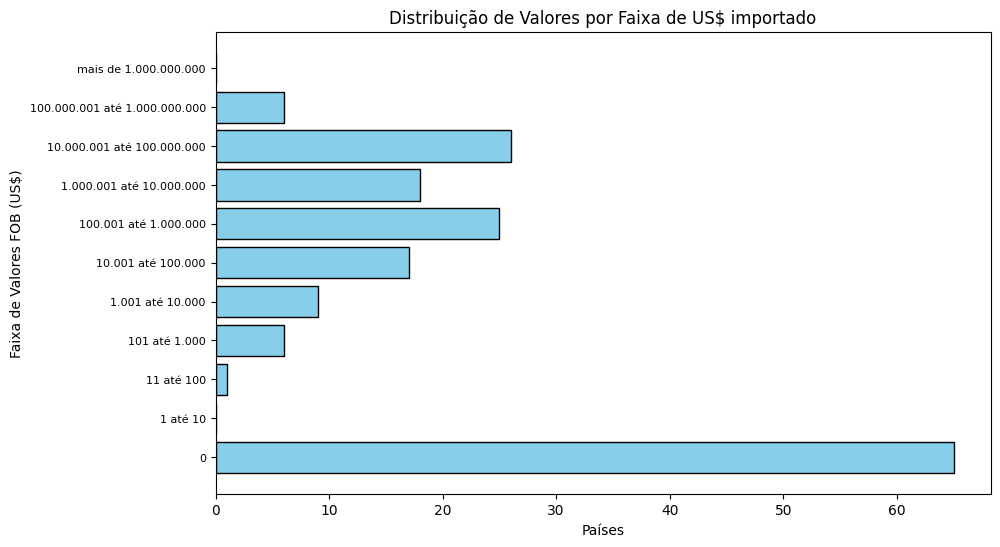

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(df_plot['Faixa'], df_plot['count'], color='skyblue', edgecolor='black')

plt.yticks(fontsize=8)
# Adicionar rótulos e título
plt.xlabel('Países')
plt.ylabel('Faixa de Valores FOB (US$)')
plt.title('Distribuição de Valores por Faixa de US$ importado')

# Exibir o gráfico
plt.show()

In [ ]:
df

,Mês,País,Código Seção,Código SH2,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,2016 - Valor US$ FOB,2015 - Valor US$ FOB,2014 - Valor US$ FOB
0,Janeiro,China,XI,52,0,979,895348,2635553,695049,0,0,579027,0,0
2,Março,Estados Unidos,V,27,8597875,3614252,2450201,1617857,780478,0,0,0,0,0
3,Janeiro,Estados Unidos,XVI,85,5044342,1809316,3060859,2493709,6278481,5782543,3905852,760423,443001,2161946
4,Maio,Estados Unidos,XVI,85,4169127,1998259,843573,1177696,9190496,4200663,4526093,6300873,2879738,3655088
5,Janeiro,Estados Unidos,V,27,4462166,2502437,1322685,765494,2395288,0,793,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19320,Fevereiro,Egito,IX,45,0,0,0,0,0,0,0,0,0,1
19321,Janeiro,El Salvador,XV,76,0,0,0,0,0,0,0,0,0,1
19322,Junho,Panamá,XIV,71,0,0,0,0,0,0,0,0,0,1
19323,Janeiro,China,X,49,0,0,0,0,0,0,0,0,0,0


# Ano - vendas

In [ ]:
df_mes = df[['Mês','2023 - Valor US$ FOB']].groupby('Mês').sum()
df_mes = df_mes.reindex(list(MESES.keys()))
df_mes = df_mes.reset_index()
df_mes

,Mês,2023 - Valor US$ FOB
0,Janeiro,89287927
1,Fevereiro,83108136
2,Março,104870860
3,Abril,88963878
4,Maio,117074945
5,Junho,87392904
6,Julho,87380098
7,Agosto,84950564
8,Setembro,77526685
9,Outubro,98309700


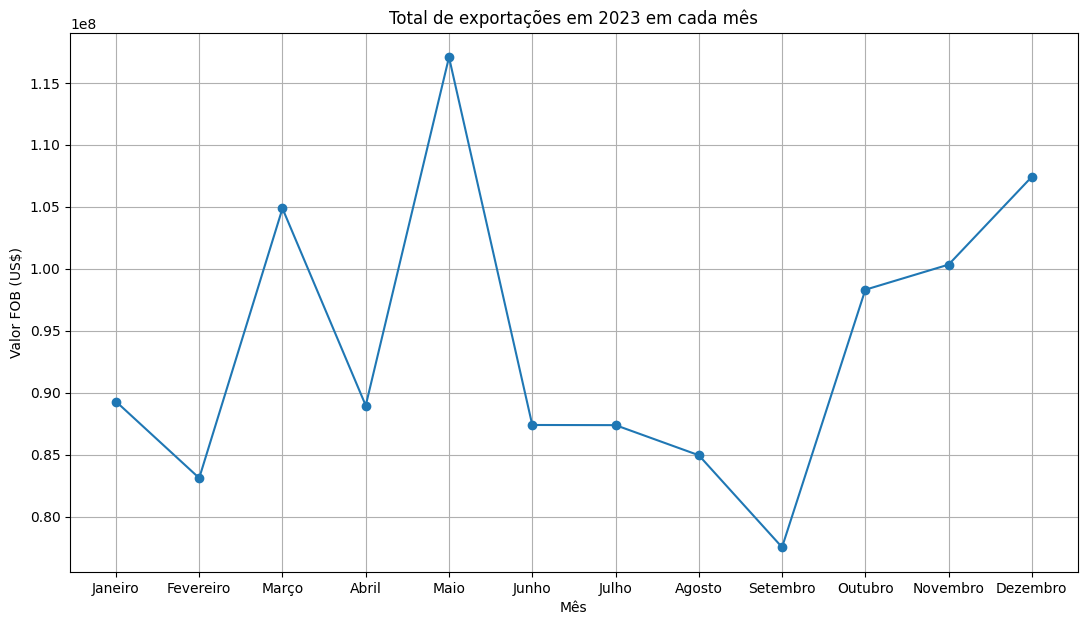

In [ ]:
plt.figure(figsize=(13, 7))
plt.plot('Mês', '2023 - Valor US$ FOB', data=df_mes, linestyle='-', marker='o')

plt.grid()
plt.xlabel("Mês")
plt.ylabel("Valor FOB (US$)")
plt.title("Total de exportações em 2023 em cada mês")
plt.show()

# Meses - Ultimos 5 anos - Venda

In [ ]:
df.iloc[:,[0,4,5,6,7,8,9,10,11,12,13]]

,Mês,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,2016 - Valor US$ FOB,2015 - Valor US$ FOB,2014 - Valor US$ FOB
0,Janeiro,0,979,895348,2635553,695049,0,0,579027,0,0
2,Março,8597875,3614252,2450201,1617857,780478,0,0,0,0,0
3,Janeiro,5044342,1809316,3060859,2493709,6278481,5782543,3905852,760423,443001,2161946
4,Maio,4169127,1998259,843573,1177696,9190496,4200663,4526093,6300873,2879738,3655088
5,Janeiro,4462166,2502437,1322685,765494,2395288,0,793,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19320,Fevereiro,0,0,0,0,0,0,0,0,0,1
19321,Janeiro,0,0,0,0,0,0,0,0,0,1
19322,Junho,0,0,0,0,0,0,0,0,0,1
19323,Janeiro,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_mes2 = df.iloc[:,[0,4,5,6,7,8]].groupby('Mês').sum()
df_mes2 = df_mes2.reindex(list(MESES.keys()))
df_mes2 = df_mes2.reset_index()
df_mes2

,Mês,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB
0,Janeiro,89287927,53056942,52938681,62378850,72976346
1,Fevereiro,83108136,67811185,47423935,57792551,73757102
2,Março,104870860,73367620,59270397,64784306,76395683
3,Abril,88963878,77265339,72109566,48259967,99309834
4,Maio,117074945,88581485,66341133,41624439,90596193
5,Junho,87392904,88800950,64670245,44846925,81419305
6,Julho,87380098,83023474,58744695,53060094,97777173
7,Agosto,84950564,100221642,79914955,77036521,102332330
8,Setembro,77526685,91771368,76744653,63380427,99171140
9,Outubro,98309700,91140206,76319284,60857624,102434357


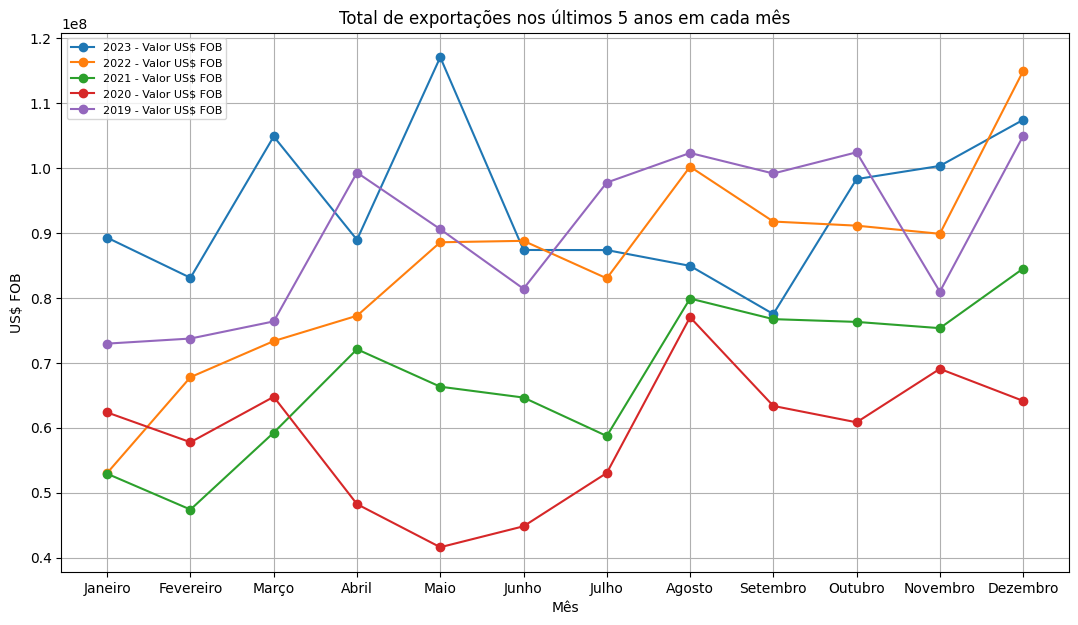

In [ ]:
plt.figure(figsize=(13, 7))
for col in df_mes2.columns[1:]:
  plt.plot('Mês', col, data=df_mes2, linestyle='-', marker='o', label=f'{col}')

plt.grid()
plt.xlabel("Mês")
plt.ylabel("US$ FOB")
plt.title("Total de exportações nos últimos 5 anos em cada mês")
plt.legend(loc=2, prop={'size': 8})
plt.show()

# Gráfico quadrado - Seção

In [ ]:
tot = df_sec['2023 - Valor US$ FOB'].sum()
percent = []
for v in df_sec['2023 - Valor US$ FOB']:
  percent.append((v/tot)*100)
percent


[41.91984595348521,
 17.860133856178123,
 11.284240272733815,
 8.599684805396095,
 5.15996818434629,
 4.20252847392604,
 3.3895073711213404,
 3.3366961112619413,
 2.7135000429631204,
 0.7274838097354632,
 0.40666100021125057,
 0.14294802598376793,
 0.11584611541605905,
 0.06964688099705761,
 0.040314688882882796,
 0.012309730420329946,
 0.01075979702739054,
 0.004883594965039864,
 0.0023995475515246763,
 0.0006417373972598731,
 0.0]

In [ ]:
df_sec.iloc[5:].sum()

Código Seção            XVIIXVXIIVIIIIIXIIIXXXIVIIIXXIXIIIXXIVXXII
2023 - Valor US$ FOB                                     170978656
percent                                                  15.176127
dtype: object

In [ ]:
df_sec = df[['Código Seção','2023 - Valor US$ FOB']].groupby('Código Seção').sum().reset_index()
df_sec = df_sec.sort_values('2023 - Valor US$ FOB', ascending=False)
df_sec['percent'] = percent
df_sec

,Código Seção,2023 - Valor US$ FOB,percent
15,XVI,472281166,41.919846
5,V,201217458,17.860134
7,VII,127131530,11.284240
6,VI,96886548,8.599685
17,XVIII,58133701,5.159968
16,XVII,47346907,4.202528
14,XV,38187175,3.389507
10,XI,37592188,3.336696
3,IV,30571080,2.713500
1,II,8196044,0.727484


In [ ]:
serie = df_sec.iloc[6:,:].sum()
serie['Código Seção'] = 'Outros'
serie


Código Seção               Outros
2023 - Valor US$ FOB    123631749
percent                 10.973598
dtype: object

In [ ]:
df_sec = df_sec.iloc[:6,:]
df_sec = pd.concat([df_sec, serie.to_frame().T], ignore_index=True)
df_sec

,Código Seção,2023 - Valor US$ FOB,percent
0,XVI,472281166,41.919846
1,V,201217458,17.860134
2,VII,127131530,11.28424
3,VI,96886548,8.599685
4,XVIII,58133701,5.159968
5,XVII,47346907,4.202528
6,Outros,123631749,10.973598


# IMPORT SQUAREFY

In [ ]:
pip install squarify

In [ ]:
import squarify

# Principais categorias exportadas

In [ ]:
df_sh2 = dff[['Código SH2','2023 - Valor US$ FOB']].groupby('Código SH2').sum().reset_index()
df_sh2 = df_sh2.sort_values('2023 - Valor US$ FOB', ascending=False)
df_sh2['percent'] = ((df_sh2['2023 - Valor US$ FOB']/df_sh2['2023 - Valor US$ FOB'].sum())*100).round(2)
df_sh2

,Código SH2,2023 - Valor US$ FOB,percent
82,85,1236985810,36.93
81,84,533111924,15.92
26,27,351095095,10.48
29,30,211941957,6.33
87,90,207144017,6.18
...,...,...,...
23,24,0,0.00
49,50,0,0.00
46,47,0,0.00
35,36,0,0.00


In [ ]:
serie = df_sh2.iloc[10:,:].sum()
serie['Código SH2'] = 'Outros'
serie


Código SH2                   Outros
2023 - Valor US$ FOB    354559941.0
percent                       10.59
dtype: object

In [ ]:
df_sh2 = df_sh2.iloc[:10,:]
df_sh2 = pd.concat([df_sh2, serie.to_frame().T], ignore_index=True)
df_sh2

,Código SH2,2023 - Valor US$ FOB,percent
0,85,1236985810,36.93
1,84,533111924,15.92
2,27,351095095,10.48
3,30,211941957,6.33
4,90,207144017,6.18
5,29,156111953,4.66
6,87,92973894,2.78
7,39,85816225,2.56
8,40,69830992,2.08
9,73,50019444,1.49


In [ ]:
imp = df_apoio[df_apoio['Código SH2'].isin(list(df_sh2['Código SH2']))][['Descrição SH2','Código SH2']].drop_duplicates().set_index('Código SH2')['Descrição SH2']
imp = imp.to_dict()
imp['Outros'] = 'Outros'
imp

{52: 'Algodão',
 85: 'Máquinas, aparelhos e materiais elétricos, e suas partes; aparelhos de gravação ou de reprodução de som, aparelhos de gravação ou de reprodução de imagens e de som em televisão, e suas partes e acessórios',
 27: 'Combustíveis minerais, óleos minerais e produtos da sua destilação; matérias betuminosas; ceras minerais',
 84: 'Reatores nucleares, caldeiras, máquinas, aparelhos e instrumentos mecânicos, e suas partes',
 40: 'Borracha e suas obras',
 30: 'Produtos farmacêuticos',
 39: 'Plásticos e suas obras',
 87: 'Veículos automóveis, tratores, ciclos e outros veículos terrestres, suas partes e acessórios',
 73: 'Obras de ferro fundido, ferro ou aço',
 90: 'Instrumentos e aparelhos de óptica, de fotografia, de cinematografia, de medida, de controle ou de precisão; instrumentos e aparelhos médico-cirúrgicos; suas partes e acessórios',
 'Outros': 'Outros'}

In [ ]:
df_sh2['desc'] = df_sh2['Código SH2'].map(imp)
df_sh2

,Código SH2,2023 - Valor US$ FOB,percent,label,desc
0,84,307564185,27.3,"Código: 84 - 27.3%\nReatores nucleares, caldei...","Reatores nucleares, caldeiras, máquinas, apare..."
1,27,201025850,17.84,"Código: 27 - 17.84%\nCombustíveis minerais, ól...","Combustíveis minerais, óleos minerais e produt..."
2,85,164716981,14.62,"Código: 85 - 14.62%\nMáquinas, aparelhos e mat...","Máquinas, aparelhos e materiais elétricos, e s..."
3,40,105940166,9.4,Código: 40 - 9.4%\nBorracha e suas obras,Borracha e suas obras
4,30,74799118,6.64,Código: 30 - 6.64%\nProdutos farmacêuticos,Produtos farmacêuticos
5,90,58119709,5.16,Código: 90 - 5.16%\nInstrumentos e aparelhos d...,"Instrumentos e aparelhos de óptica, de fotogra..."
6,87,41031537,3.64,"Código: 87 - 3.64%\nVeículos automóveis, trato...","Veículos automóveis, tratores, ciclos e outros..."
7,52,34931986,3.1,Código: 52 - 3.1%\nAlgodão,Algodão
8,73,25136719,2.23,"Código: 73 - 2.23%\nObras de ferro fundido, fe...","Obras de ferro fundido, ferro ou aço"
9,39,21191364,1.88,Código: 39 - 1.88%\nPlásticos e suas obras,Plásticos e suas obras


In [ ]:
new_desc = []
for d in df_sh2['desc']:
  new_str = d.replace(',','\n')
  new_str = new_str.replace(';', '\n')
  new_desc.append(new_str)
df_sh2['desc'] = new_desc

KeyError: 'desc'

In [ ]:
df_sh2['label'] = 'Código: ' + df_sh2['Código SH2'].astype(str) + '\n' + df_sh2['percent'].astype(str) + '%\n'#+ df_sh2['desc']
df_sh2

,Código SH2,2023 - Valor US$ FOB,percent,label
0,85,1236985810,36.93,Código: 85\n36.93%\n
1,84,533111924,15.92,Código: 84\n15.92%\n
2,27,351095095,10.48,Código: 27\n10.48%\n
3,30,211941957,6.33,Código: 30\n6.33%\n
4,90,207144017,6.18,Código: 90\n6.18%\n
5,29,156111953,4.66,Código: 29\n4.66%\n
6,87,92973894,2.78,Código: 87\n2.78%\n
7,39,85816225,2.56,Código: 39\n2.56%\n
8,40,69830992,2.08,Código: 40\n2.08%\n
9,73,50019444,1.49,Código: 73\n1.49%\n


In [ ]:
df_sh2_2 = df[['Código SH2','2023 - Valor US$ FOB']].groupby('Código SH2').sum().reset_index()
df_sh2_2 = df_sh2.sort_values('2023 - Valor US$ FOB', ascending=False)
df_sh2

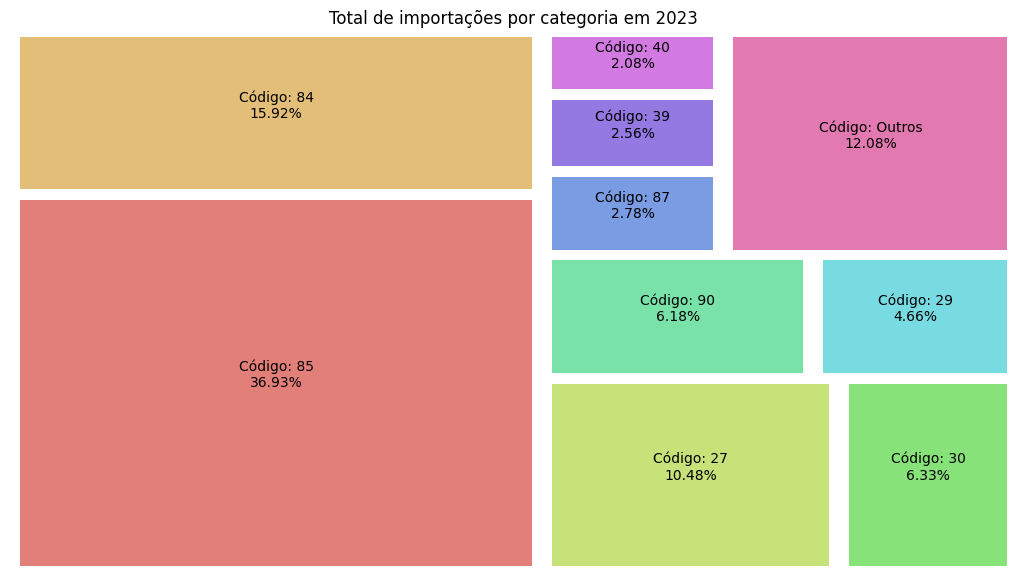

In [ ]:
def cat_ano(ano):
  df_shg = dff[['Código SH2',ano]].groupby('Código SH2').sum().reset_index()
  df_shg = df_shg.sort_values(ano, ascending=False)
  df_shg['percent'] = ((df_shg[ano]/df_shg[ano].sum())*100).round(2)
  df_shg

  serie = df_shg.iloc[9:,:].sum()
  serie['Código SH2'] = 'Outros'

  df_shg = df_shg.iloc[:9,:]
  df_shg = pd.concat([df_shg, serie.to_frame().T], ignore_index=True)

  df_shg['label'] = 'Código: ' + df_shg['Código SH2'].astype(str) + '\n' + df_shg['percent'].astype(str) + '%\n'#+ df_sh2['desc']

  plt.figure(figsize=(13, 7))
  squarify.plot(sizes=df_shg[ano],
                label=df_shg['label'],
                alpha=.8,
                pad = 0.25,
                color = sns.color_palette("hls",
                                      len(df_shg[ano])),
                text_kwargs = {'fontsize': 10}
                )
  plt.title("Total de importações por categoria em "+ano.split('-')[0].strip())
  plt.axis('off')
  plt.show()
  return df_shg

df_gg = cat_ano('2023 - Valor US$ FOB')

In [ ]:
dff[['Código SH2','2023 - Valor US$ FOB']].groupby('Código SH2').sum().reset_index().sort_values('2023 - Valor US$ FOB', ascending=False)

,Código SH2,2023 - Valor US$ FOB
82,85,1236985810
81,84,533111924
26,27,351095095
29,30,211941957
87,90,207144017
...,...,...
23,24,0
49,50,0
46,47,0
35,36,0


In [ ]:
df.iloc[:,4:9].columns

Index(['2023 - Valor US$ FOB', '2022 - Valor US$ FOB', '2021 - Valor US$ FOB',
       '2020 - Valor US$ FOB', '2019 - Valor US$ FOB'],
      dtype='object')

In [ ]:
df

,Código SH2,percent-2019
77,84,28.49
78,85,22.74
28,30,7.77
83,90,7.32
48,52,6.14
...,...,...
35,37,0.00
24,26,0.00
47,51,0.00
1,2,0.00


In [ ]:
dff.iloc[:,3:8]

,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB
0,28294573,18699,0,0,0
2,35897621,58646363,29533369,36619693,55562280
3,0,0,153442,0,0
4,43765586,42524336,35923018,43855632,42853280
5,37427403,39770740,31290381,12916239,42866566
...,...,...,...,...,...
18714,0,0,0,0,0
18715,0,0,0,0,0
18716,0,0,0,0,0
18717,0,0,0,0,0


In [ ]:
anos = dff.iloc[:,3:8].columns
dataframes = []
for ano in anos:
  df_shg = dff[['Código SH2',ano]].groupby('Código SH2').sum().reset_index()
  df_shg = df_shg.sort_values(ano, ascending=False)
  new_percent = 'percent-'+ano.split('-')[0].strip()
  df_shg[new_percent] = ((df_shg[ano]/df_shg[ano].sum())*100).round(2)
  df_shg.drop(ano, axis=1, inplace=True)
  dataframes.append(df_shg)
dataframes.reverse()

In [ ]:
dataframes

[    Código SH2  percent-2019
 77          84         28.49
 78          85         22.74
 28          30          7.77
 83          90          7.32
 48          52          6.14
 ..         ...           ...
 35          37          0.00
 24          26          0.00
 47          51          0.00
 1            2          0.00
 90          99          0.00
 
 [91 rows x 2 columns],
     Código SH2  percent-2020
 77          84         23.21
 78          85         19.61
 28          30         13.66
 48          52         11.89
 38          40          6.85
 ..         ...           ...
 39          41          0.00
 35          37          0.00
 15          16          0.00
 19          20          0.00
 90          99          0.00
 
 [91 rows x 2 columns],
     Código SH2  percent-2021
 77          84         25.13
 78          85         16.42
 28          30         13.04
 25          27          9.91
 38          40          6.50
 ..         ...           ...
 34          36   

In [ ]:
result = dataframes[0]

# Perform iterative left merges
for dfff in dataframes[1:]:
    result = pd.merge(result, dfff, on='Código SH2', how='left')

# Display the result
result

,Código SH2,percent-2019,percent-2020,percent-2021,percent-2022,percent-2023
0,85,47.21,47.98,42.92,41.18,36.93
1,84,15.24,13.34,16.71,16.71,15.92
2,29,6.08,7.83,8.11,7.10,4.66
3,90,5.04,4.45,5.45,5.58,6.18
4,30,4.88,5.54,4.50,4.66,6.33
...,...,...,...,...,...,...
90,47,0.00,0.00,0.00,0.00,0.00
91,2,0.00,0.00,0.00,0.00,0.00
92,50,0.00,0.00,0.00,0.00,0.00
93,53,0.00,0.00,0.00,0.00,0.00


In [ ]:
result.sort_values(['percent-2020'], ascending=False).iloc[:10,:]

,Código SH2,percent-2019,percent-2020,percent-2021,percent-2022,percent-2023
0,85,47.21,47.98,42.92,41.18,36.93
1,84,15.24,13.34,16.71,16.71,15.92
2,29,6.08,7.83,8.11,7.10,4.66
4,30,4.88,5.54,4.50,4.66,6.33
3,90,5.04,4.45,5.45,5.58,6.18
5,39,3.13,3.49,3.16,3.51,2.56
6,87,2.50,2.31,2.57,3.01,2.78
7,40,2.35,2.23,2.69,3.31,2.08
8,73,2.30,1.67,2.23,2.23,1.49
9,38,1.32,1.45,2.03,2.48,1.33


In [ ]:
result[result['Código SH2']==30].iloc[:,1:].values.flatten().tolist()

[7.77, 13.66, 13.04, 7.61, 6.64]

In [ ]:
bars4

[7.32, 2.18, 3.72, 3.48, 5.16]

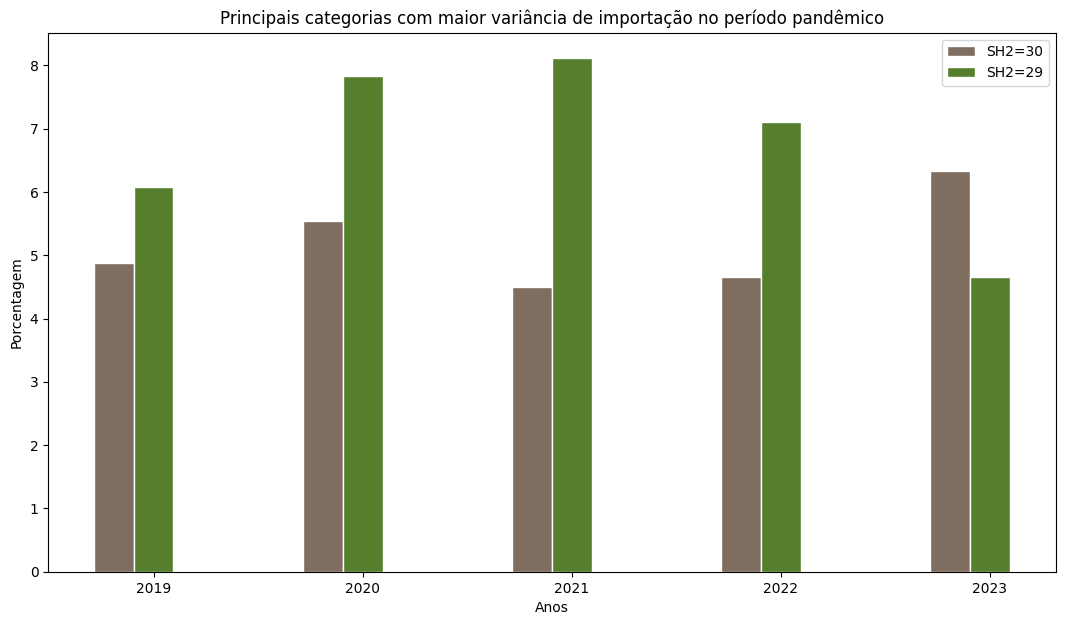

In [ ]:
plt.figure(figsize=(13, 7))

barWidth = 0.19

# set heights of bars
bars1 = result[result['Código SH2']==30].iloc[:,1:].values.flatten().tolist()
bars2 = result[result['Código SH2']==29].iloc[:,1:].values.flatten().tolist()
#bars3 = result[result['Código SH2']==85].iloc[:,1:].values.flatten().tolist()
#bars4 = result[result['Código SH2']==90].iloc[:,1:].values.flatten().tolist()

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]
#r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='SH2=30')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='SH2=29')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='SH2=85')
#plt.bar(r4, bars4, color='#2d7fb8', width=barWidth, edgecolor='white', label='SH2=90')

# Add xticks on the middle of the group bars
plt.title('Principais categorias com maior variância de importação no período pandêmico')
plt.xlabel('Anos')
plt.ylabel('Porcentagem')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2019', '2020', '2021', '2022', '2023'])

# Create legend & Show graphic
plt.legend()
plt.show()

# Parte Mapa

In [ ]:
dff[['País','2023 - Valor US$ FOB']].groupby('País').count().reset_index()['País'].unique()

array(['Afeganistão', 'Aland, Ilhas', 'Albânia', 'Alemanha', 'Andorra',
       'Angola', 'Anguilla', 'Argentina', 'Argélia', 'Armênia',
       'Arábia Saudita', 'Austrália', 'Azerbaijão', 'Bangladesh',
       'Barbados', 'Barein', 'Belarus', 'Belize', 'Bolívia', 'Brasil',
       'Bulgária', 'Bélgica', 'Bósnia-Herzegovina', 'Cabo Verde',
       'Camarões', 'Camboja', 'Canadá', 'Canal, Ilhas do (Guernsey)',
       'Catar', 'Cayman, Ilhas', 'Cazaquistão', 'Chade', 'Chile', 'China',
       'Chipre', 'Christmas (Navidad), Ilha', 'Cocos (Keeling), Ilhas',
       'Colômbia', 'Comores', 'Congo', 'Congo, República Democrática',
       'Coreia do Norte', 'Coreia do Sul', 'Costa Rica',
       'Costa do Marfim', 'Coveite (Kuweit)', 'Croácia', 'Cuba',
       'Curaçao', 'Dinamarca', 'Djibuti', 'Egito', 'El Salvador',
       'Emirados Árabes Unidos', 'Equador', 'Eslováquia', 'Eslovênia',
       'Espanha', 'Estados Unidos', 'Estônia', 'Faroe, Ilhas', 'Fiji',
       'Filipinas', 'Finlândia', 'França', 

In [ ]:
mapa = df[['País','2023 - Valor US$ FOB']].groupby('País').sum().reset_index()
mapa['country'] = ['Afghanistan', 'Albania', 'Germany', 'Angola',
 'Netherlands Antilles', 'Antigua & Barbuda', 'Argentina', 'Algeria',
 'Aruba', 'Saudi Arabia', 'Australia', 'Bahamas', 'Bangladesh',
 'Barbados', 'Bahrain', 'Belarus', 'Belize', 'Benin', 'Bermuda',
 'Bolivia', 'Bonaire, Saint Eustatius and Saba', 'Botswana', 'Brazil',
 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Belgium',
 'Bosnia & Herzegovina', 'Cape Verde', 'Cameroon', 'Cambodia',
 'Canada', 'Canary Islands', 'Qatar', 'Chad', 'Chile', 'China',
 'Cyprus', 'Colombia', 'Congo', 'Democratic Republic of the Congo',
 'Democratic People\'s Republic of Korea', 'Republic of Korea', 'Costa Rica',
 'Ivory Coast', 'Kuwait', 'Croatia', 'Cuba',
 'Curaçao', 'Denmark', 'Djibouti', 'Dominica', 'Egypt',
 'El Salvador', 'United Arab Emirates', 'Ecuador', 'Slovakia',
 'Slovenia', 'Spain', 'United States of America', 'Estonia', 'Ethiopia',
 'Falkland Islands (Malvinas)', 'Philippines', 'Finland', 'France', 'Gabon',
 'Ghana', 'Georgia', 'Grenada', 'Greece', 'Guadeloupe', 'Guatemala',
 'Guyana', 'French Guiana', 'Guinea', 'Guinea-Bissau', 'Gambia',
 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Indonesia', 'Iraq',
 'Ireland', 'Iran (Islamic Republic of)', 'Iceland', 'Israel', 'Italy', 'Yemen',
 'Jamaica', 'Japan', 'Jordan', 'Latvia', 'Lithuania',
 'Luxembourg', 'Lebanon', 'Libyan Arab Jamahiriya', 'Macao', 'The former Yugoslav Republic of Macedonia',
 'Madagascar', 'Malawi', 'Mali', 'Malta', 'Malaysia', 'Morocco',
 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius',
 'Myanmar', 'Micronesia (Federated States of)', 'Moldova, Republic of', 'Mongolia', 'Mozambique',
 'Mexico', 'Monaco', 'Namibia', 'Nepal', 'Nicaragua', 'Nigeria',
 'Norfolk Island', 'Norway', 'New Caledonia', 'New Zealand',
 'Niger', 'Oman', 'Pacific Islands (USA)', 'Panama',
 'Papua New Guinea', 'Pakistan', 'Paraguay',
 'Netherlands', 'Peru', 'French Polynesia', 'Poland',
 'Puerto Rico', 'Portugal', 'Provision of Ships and Aircraft',
 'Kenya', 'U.K. of Great Britain and Northern Ireland', 'Central African Republic',
 'Dominican Republic', 'Reunion', 'Romania', 'Rwanda', 'Russian Federation',
 'American Samoa', 'Saint Lucia', 'Seychelles', 'Senegal',
 'Sierra Leone', 'Singapore', 'Somalia', 'Sri Lanka', 'Sudan',
 'Suriname', 'Sweden', 'Switzerland', 'Saint Barthelemy',
 'Saint Martin, Island of (French part)', 'Saint Pierre and Miquelon',
 'Sao Tome and Principe', 'Saint Vincent and the Grenadines', 'Serbia',
 'Thailand', 'Taiwan', 'United Republic of Tanzania', 'Czech Republic',
 'French Southern and Antarctic Territories', 'Timor-Leste', 'Togo', 'Tonga',
 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Ukraine', 'Uganda',
 'Uruguay', 'Uzbekistan', 'Vatican', 'Venezuela', 'Vietnam',
 'British Virgin Islands', 'Zimbabwe', 'Zambia',
 'South Africa', 'Austria', 'India']
mapa

,País,2023 - Valor US$ FOB,country
0,Afeganistão,0,Afghanistan
1,Albânia,85770,Albania
2,Alemanha,96260047,Germany
3,Angola,2450864,Angola
4,Antilhas Holandesas,0,Netherlands Antilles
...,...,...,...
185,Zimbábue,0,Zimbabwe
186,Zâmbia,15288,Zambia
187,África do Sul,8818546,South Africa
188,Áustria,1772853,Austria


In [ ]:
mapa = mapa[~mapa['country'].isin(['Bonaire, Saint Eustatius and Saba',
                            'Canary Islands',
                            'Ivory Coast',
                            'Curaçao',
                            'Pacific Islands (USA)',
                            'Provision of Ships and Aircraft',
                            'Saint Barthelemy',
                            'Vatican',
                            'Saint Pierre and Miquelon',
                            'Saint Martin, Island of (French part)'])]


In [ ]:
mapa.to_excel('fob_export_exp.xlsx')

In [ ]:
mapa2 = dff[['País','2023 - Valor US$ FOB']].groupby('País').sum().reset_index()
mapa2['country'] = ['Afghanistan', 'Aland, Islands', 'Albania', 'Germany', 'Andorra',
 'Angola', 'Anguilla', 'Argentina', 'Algeria', 'Armenia',
 'Saudi Arabia', 'Australia', 'Azerbaijan', 'Bangladesh',
 'Barbados', 'Bahrain', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
 'Bulgaria', 'Belgium', 'Bosnia & Herzegovina', 'Cape Verde',
 'Cameroon', 'Cambodia', 'Canada', 'Channel Islands (Guernsey)',
 'Qatar', 'Cayman Islands', 'Kazakhstan', 'Chad', 'Chile', 'China',
 'Cyprus', 'Christmas (Navidad), Island', 'Cocos (Keeling), Islands',
 'Colombia', 'Comoros', 'Congo', 'Democratic Republic of the Congo',
 'Democratic People\'s Republic of Korea', 'Republic of Korea', 'Costa Rica',
 'Ivory Coast', 'Kuwait', 'Croatia', 'Cuba',
 'Curaçao', 'Denmark', 'Djibouti', 'Egypt', 'El Salvador',
 'United Arab Emirates', 'Ecuador', 'Slovakia', 'Slovenia',
 'Spain', 'United States of America', 'Estonia', 'Faroe Islands', 'Fiji',
 'Philippines', 'Finland', 'France', 'Gabon', 'Georgia',
 'Gibraltar', 'Grenada', 'Greece', 'Guatemala', 'Guinea', 'Honduras',
 'Hong Kong', 'Hungary', 'Indonesia', 'Ireland', 'Iran (Islamic Republic of)', 'Iceland',
 'Israel', 'Italy', 'Yemen', 'Japan', 'Jersey', 'Jordan',
 'Kiribati', 'Laos', 'Lesotho', 'Latvia', 'Liberia',
 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Lebanon', 'Libyan Arab Jamahiriya',
 'Macao', 'The former Yugoslav Republic of Macedonia', 'Madagascar', 'Malawi', 'Mali', 'Malta',
 'Malaysia', 'Morocco', 'Marshall Islands', 'Mauritania', 'Mauritius',
 'Myanmar', 'Moldova, Republic of', 'Mongolia', 'Mozambique', 'Mexico',
 'Monaco', 'Namibia', 'Nicaragua', 'Nigeria', 'Niue', 'Norway',
 'New Caledonia', 'New Zealand', 'Niger', 'Oman',
 'Pacific Islands (USA)', 'Palau', 'Gaza Strip', 'Panama',
 'Pakistan', 'Paraguay', 'Netherlands', 'Peru',
 'French Polynesia', 'Poland', 'Puerto Rico', 'Portugal',
 'Kyrgyzstan', 'Kenya', 'U.K. of Great Britain and Northern Ireland',
 'Central African Republic', 'Dominican Republic', 'Reunion',
 'Romania', 'Russian Federation', 'Seychelles', 'Senegal', 'Sierra Leone',
 'Singapore', 'Sri Lanka', 'Swaziland', 'Suriname', 'Sweden',
 'Switzerland', 'Saint Kitts and Nevis', 'Saint Tome and Principe', 'Serbia',
 'Thailand', 'Taiwan', 'Czech Republic',
 'French Southern and Antarctic Territories',
 'British Indian Ocean Territory', 'Tonga', 'Tokelau',
 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay',
 'Uzbekistan', 'Venezuela', 'Vietnam',
 'British Virgin Islands', 'Zimbabwe', 'South Africa',
 'Austria', 'India']
mapa2


,País,2023 - Valor US$ FOB,country
0,Afeganistão,0,Afghanistan
1,"Aland, Ilhas",649,"Aland, Islands"
2,Albânia,3375,Albania
3,Alemanha,241996705,Germany
4,Andorra,333,Andorra
...,...,...,...
168,"Virgens, Ilhas (Britânicas)",0,British Virgin Islands
169,Zimbábue,0,Zimbabwe
170,África do Sul,3893755,South Africa
171,Áustria,18034104,Austria


In [ ]:
mapa2 = mapa2[~mapa2['country'].isin([
                  'Aland, Islands'
                  'Christmas (Navidad), Island'
                  'Channel Islands (Guernsey)'
                  'Cocos (Keeling), Islands'
                  'Ivory Coast'
                  'Curação'
                  'Laos'
                  'Saint Tome and Principe'
                  'Pacific Islands (USA)'])]

In [ ]:
mapa2.to_excel('fob_import_imp.xlsx')

# Maior vendas e SH2

In [ ]:
df_vc = dff[['País','Código SH2','2023 - Valor US$ FOB']]
total_vendido = df_vc.groupby('País')['2023 - Valor US$ FOB'].sum().reset_index()
total_vendido

,País,2023 - Valor US$ FOB
0,Afeganistão,0
1,"Aland, Ilhas",649
2,Albânia,3375
3,Alemanha,241996705
4,Andorra,333
...,...,...
168,"Virgens, Ilhas (Britânicas)",0
169,Zimbábue,0
170,África do Sul,3893755
171,Áustria,18034104


In [ ]:
df_vc.groupby('País').sum().sort_values('2023 - Valor US$ FOB', ascending=False)

,Código SH2,2023 - Valor US$ FOB
País,,
Estados Unidos,44547,543283875
China,42741,497909117
Vietnã,17655,435509340
Rússia,10676,360877264
Coreia do Sul,29552,312422219
...,...,...
Islândia,410,0
Honduras,401,0
Guiné,85,0


In [ ]:
idx = df_vc.groupby(['País','Código SH2']).sum().reset_index().groupby('País')['2023 - Valor US$ FOB'].idxmax()
maior_cat = df_vc.groupby(['País', 'Código SH2']).sum().reset_index().loc[idx].reset_index()
maior_cat = maior_cat.iloc[:,1:]
maior_cat

,País,Código SH2,2023 - Valor US$ FOB
0,Afeganistão,39,0
1,"Aland, Ilhas",90,649
2,Albânia,85,3375
3,Alemanha,84,99613117
4,Andorra,39,323
...,...,...,...
168,"Virgens, Ilhas (Britânicas)",84,0
169,Zimbábue,46,0
170,África do Sul,12,1878082
171,Áustria,84,5803013


In [ ]:
merged_vc = total_vendido.merge(maior_cat, on='País')
merged_vc = merged_vc.rename(columns={'2023 - Valor US$ FOB_x': 'Vendas totais', '2023 - Valor US$ FOB_y': 'Vendas categoria'})
merged_vc['Porcentagem categoria'] = (merged_vc['Vendas categoria'] / merged_vc['Vendas totais'] * 100).round(2)
merged_vc

,País,Vendas totais,Código SH2,Vendas categoria,Porcentagem categoria
0,Afeganistão,0,39,0,NaN
1,"Aland, Ilhas",649,90,649,100.00
2,Albânia,3375,85,3375,100.00
3,Alemanha,241996705,84,99613117,41.16
4,Andorra,333,39,323,97.00
...,...,...,...,...,...
168,"Virgens, Ilhas (Britânicas)",0,84,0,NaN
169,Zimbábue,0,46,0,NaN
170,África do Sul,3893755,12,1878082,48.23
171,Áustria,18034104,84,5803013,32.18


In [ ]:
merged_vc10 = merged_vc.sort_values('Vendas totais', ascending=False).iloc[:10,:]
merged_vc10

,País,Vendas totais,Código SH2,Vendas categoria,Porcentagem categoria
58,Estados Unidos,543283875,84,139313100,25.64
33,China,497909117,85,200620990,40.29
167,Vietnã,435509340,85,391046222,89.79
140,Rússia,360877264,27,344078913,95.35
42,Coreia do Sul,312422219,85,288618574,92.38
3,Alemanha,241996705,84,99613117,41.16
82,Japão,88814026,85,40194456,45.26
110,México,86113700,90,38396683,44.59
172,Índia,69783431,29,17951866,25.73
57,Espanha,69574816,30,30005769,43.13


<ipython-input-42-2e1679216d24>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(merged_vc10['País'], rotation=45, fontsize=10)


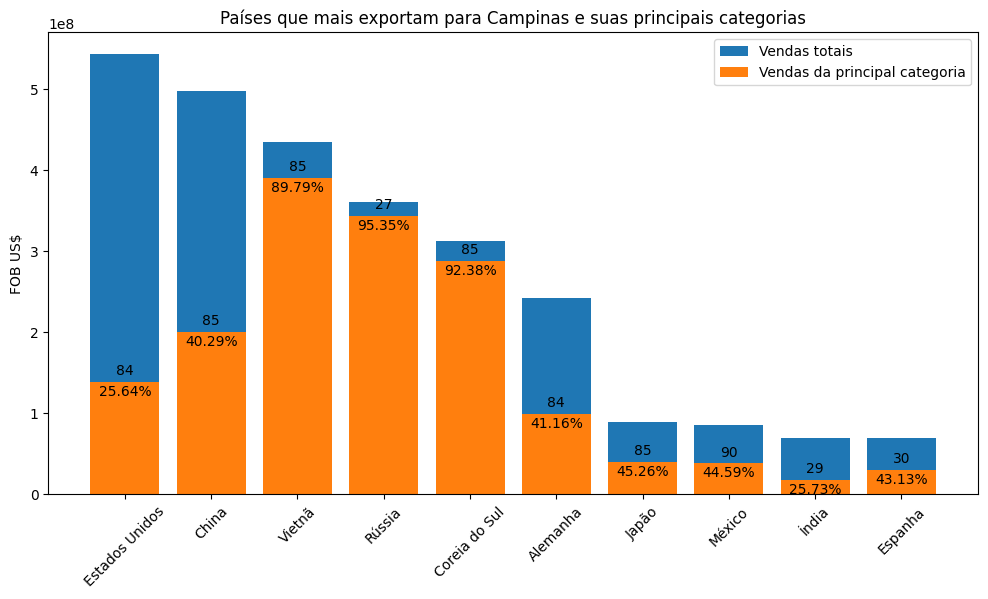

In [ ]:

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Total sales bar
bars = ax.bar(merged_vc10['País'], merged_vc10['Vendas totais'], label='Vendas totais')

# Stack with the percentage of the max category
max_category_bars = ax.bar(merged_vc10['País'], merged_vc10['Vendas categoria'], label='Vendas da principal categoria')

# Annotate the bars with the category names
for bar, category in zip(max_category_bars, merged_vc10['Código SH2']):
    height = bar.get_height()
    ax.annotate(category,
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar, percent in zip(max_category_bars, merged_vc10['Porcentagem categoria']):
    height = bar.get_height()
    percent_fmt = f'{str(percent)}%'
    ax.annotate(percent_fmt,
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -12),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add labels and title
ax.set_xticklabels(merged_vc10['País'], rotation=45, fontsize=10)
ax.set_ylabel('FOB US$')
ax.set_title('Países que mais exportam para Campinas e suas principais categorias')
ax.legend()

# Show the plot
plt.show()

# USA

In [ ]:
eua_cat = df[df['País']=='Estados Unidos'][['Código SH2','2023 - Valor US$ FOB']].groupby('Código SH2').sum().reset_index()
eua_cat['percent'] = ((eua_cat['2023 - Valor US$ FOB']/eua_cat['2023 - Valor US$ FOB'].sum())*100).round(2)
eua_cat

,Código SH2,2023 - Valor US$ FOB,percent
0,1,6,0.00
1,3,110012,0.04
2,4,0,0.00
3,5,21142,0.01
4,6,5060,0.00
...,...,...,...
81,94,275862,0.10
82,95,0,0.00
83,96,2441,0.00
84,97,121223,0.05


In [ ]:
eua_cat.sort_values('percent', ascending=False)

,Código SH2,2023 - Valor US$ FOB,percent
23,27,70931153,26.54
73,84,50535307,18.91
74,85,45478691,17.02
35,40,44378395,16.60
26,30,17240042,6.45
...,...,...,...
40,45,0,0.00
48,56,2049,0.00
49,57,0,0.00
50,58,5732,0.00


In [ ]:
df_final

,País,month,year,VOB SH2=1,VOB SH2=2,VOB SH2=3,VOB SH2=4,VOB SH2=5,VOB SH2=6,VOB SH2=7,...,VOB SH2=88,VOB SH2=89,VOB SH2=90,VOB SH2=91,VOB SH2=92,VOB SH2=94,VOB SH2=95,VOB SH2=96,VOB SH2=97,VOB SH2=99
0,Afeganistão,2,2014,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Afeganistão,2,2015,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Afeganistão,2,2016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Afeganistão,2,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Afeganistão,2,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16325,Índia,9,2019,0,0,0,0,0,0,0,...,0,0,125487,0,0,0,0,0,0,0
16326,Índia,9,2020,0,0,0,0,0,0,0,...,0,0,70787,0,0,0,0,0,0,0
16327,Índia,9,2021,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,0
16328,Índia,9,2022,0,0,0,0,0,0,0,...,0,0,40496,0,0,0,0,0,0,0


In [ ]:
df_final[df_final['year']==2023]['VOB SH2=84']

9              0
19             0
29             0
39             0
49             0
          ...   
16289      34760
16299     105907
16309    1539530
16319     434418
16329     942960
Name: VOB SH2=84, Length: 1633, dtype: int64

In [ ]:
eua_anos = []
for ano in range(2014,2024):
  eua_anos.append(df_final[(df_final['year']==ano) & (df_final['País']=='China')]['VOB SH2=85'])
eua_anos

[2680    33510717
 2690    31719418
 2700    14994405
 2710    21548048
 2720    28914390
 2730    30562394
 2740    27386396
 2750    21280347
 2760    32766660
 2770    21354604
 2780    31954588
 2790    34552548
 Name: VOB SH2=85, dtype: int64,
 2681    27726506
 2691    19470960
 2701    14285188
 2711    25274697
 2721    23060740
 2731    12737819
 2741     8751707
 2751    16330395
 2761    32515682
 2771    20226261
 2781    23984558
 2791    24908084
 Name: VOB SH2=85, dtype: int64,
 2682    25389265
 2692    21771926
 2702     9427129
 2712    20331095
 2722    24328775
 2732    20671541
 2742    22133087
 2752    23554186
 2762    29237531
 2772    13380163
 2782    15561637
 2792    17292913
 Name: VOB SH2=85, dtype: int64,
 2683    16833134
 2693    24067815
 2703    13759429
 2713    13136679
 2723    13320447
 2733    22972360
 2743    22933546
 2753    14243249
 2763    15521141
 2773    24405500
 2783    26517333
 2793    32573522
 Name: VOB SH2=85, dtype: int64,
 268

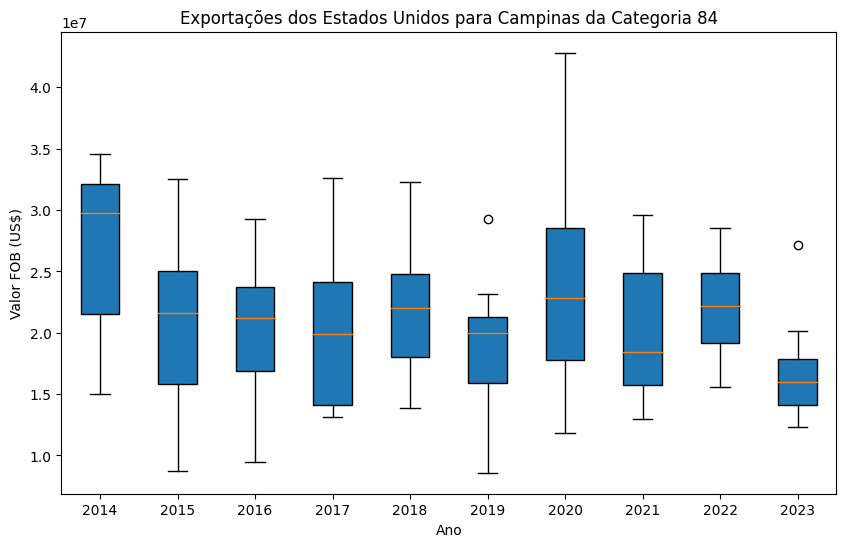

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(eua_anos, patch_artist=True)

# Adding titles and labels
plt.title('Exportações dos Estados Unidos para Campinas da Categoria 84')
plt.xlabel('Ano')
plt.ylabel('Valor FOB (US$)')
plt.xticks(range(1,11), range(2014,2024))

# Show plot
plt.show()

In [ ]:
usa_percent = df[df['País']=='Estados Unidos'][['Código SH2','2023 - Valor US$ FOB']].groupby('Código SH2').sum().reset_index()
usa_percent = usa_percent.sort_values('2023 - Valor US$ FOB', ascending=False)

serie = usa_percent.iloc[10:,:].sum()
serie['Código SH2'] = 'Outros'
usa_percent = usa_percent.iloc[:10,:]
usa_percent = pd.concat([usa_percent, serie.to_frame().T], ignore_index=True)
usa_percent

,Código SH2,2023 - Valor US$ FOB
0,27,70931153
1,84,50535307
2,85,45478691
3,40,44378395
4,30,17240042
5,73,9081968
6,39,6271571
7,90,6105238
8,87,5630348
9,88,4642556


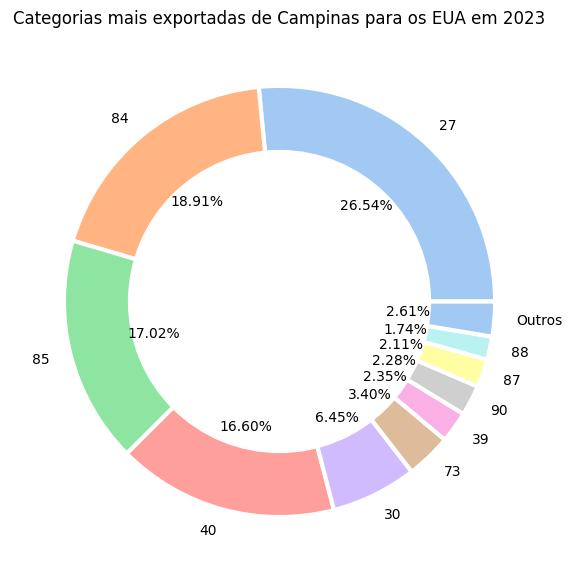

In [ ]:
plt.figure(figsize=(14, 7))
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(usa_percent['2023 - Valor US$ FOB'],
        labels=usa_percent['Código SH2'],
        colors=sns.color_palette('pastel')[0:12],
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
        autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Categorias mais exportadas de Campinas para os EUA em 2023')
# Show the graph
plt.show()

In [ ]:
df_mes2 = dff[(dff['País']=='China') & (dff['Código SH2']==85)].iloc[:,[0,3,4,5,6,7]].groupby('Mês').sum()
df_mes2 = df_mes2.reindex(list(MESES.keys()))
df_mes2 = df_mes2.reset_index()
df_mes2

,Mês,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB
0,Janeiro,27145212,19197538,28920757,11863614,20708762
1,Fevereiro,12368541,15575671,23800464,11791993,16529384
2,Março,20167391,26654537,29559775,18148948,14087971
3,Abril,16697393,22282801,20201765,16869459,19222884
4,Maio,16799625,23774859,17546963,18257654,29265596
5,Junho,14899573,17011118,13404537,27907874,21600068
6,Julho,14111195,26805657,12983056,27365379,20996223
7,Agosto,15245618,28517246,19286243,34355062,21129403
8,Setembro,14162366,24226437,15890322,42825484,23136123
9,Outubro,17420946,20932643,15220751,30409138,17000964


In [ ]:
df_mes2.describe()

,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB
count,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,1.160942e+07,1.401343e+07,8.528128e+06,7.567580e+06,1.124048e+07
std,2.969451e+06,4.208026e+06,1.914174e+06,1.583069e+06,3.415049e+06
min,6.794081e+06,8.646364e+06,4.340008e+06,5.369053e+06,6.545991e+06
25%,9.589361e+06,1.155695e+07,7.564334e+06,6.640224e+06,9.043253e+06
50%,1.152602e+07,1.331424e+07,8.470481e+06,6.931767e+06,9.931398e+06
75%,1.451987e+07,1.652155e+07,9.745330e+06,8.688240e+06,1.422090e+07
max,1.536617e+07,2.325688e+07,1.135784e+07,1.017327e+07,1.743846e+07


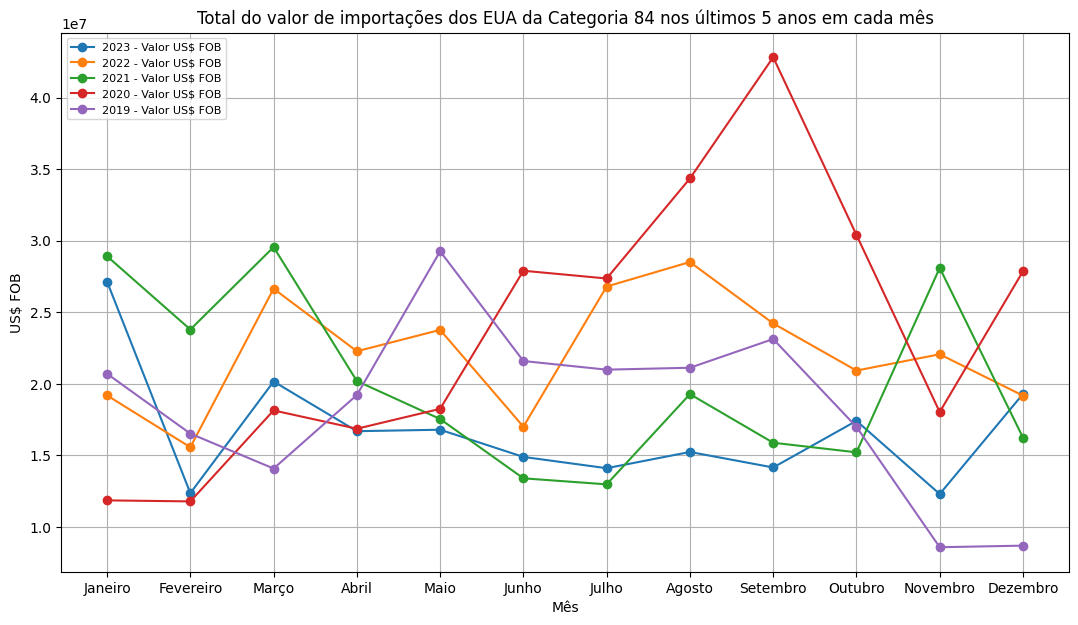

In [ ]:
plt.figure(figsize=(13, 7))
for col in df_mes2.columns[1:]:
  plt.plot('Mês', col, data=df_mes2, linestyle='-', marker='o', label=f'{col}')

plt.grid()
plt.xlabel("Mês")
plt.ylabel("US$ FOB")
plt.title("Total do valor de importações dos EUA da Categoria 84 nos últimos 5 anos em cada mês")
plt.legend(loc=2, prop={'size': 8})
plt.show()

In [ ]:
df[df['País']=='Estados Unidos'].iloc[:,4:].sum()

2023 - Valor US$ FOB    267265026
2022 - Valor US$ FOB    280158718
2021 - Valor US$ FOB    194853778
2020 - Valor US$ FOB    173624240
2019 - Valor US$ FOB    395549069
2018 - Valor US$ FOB    320640968
2017 - Valor US$ FOB    265601564
2016 - Valor US$ FOB    182719676
2015 - Valor US$ FOB    157785843
2014 - Valor US$ FOB    159086153
dtype: int64

In [ ]:
df_plot

,ano,exp
0,2014,None
1,2015,None
2,2016,None
3,2017,None
4,2018,None
5,2019,None
6,2020,None
7,2021,None
8,2022,None
9,2023,None


In [ ]:
eee

array([267265026, 280158718, 194853778, 173624240, 395549069, 320640968,
       265601564, 182719676, 157785843, 159086153])

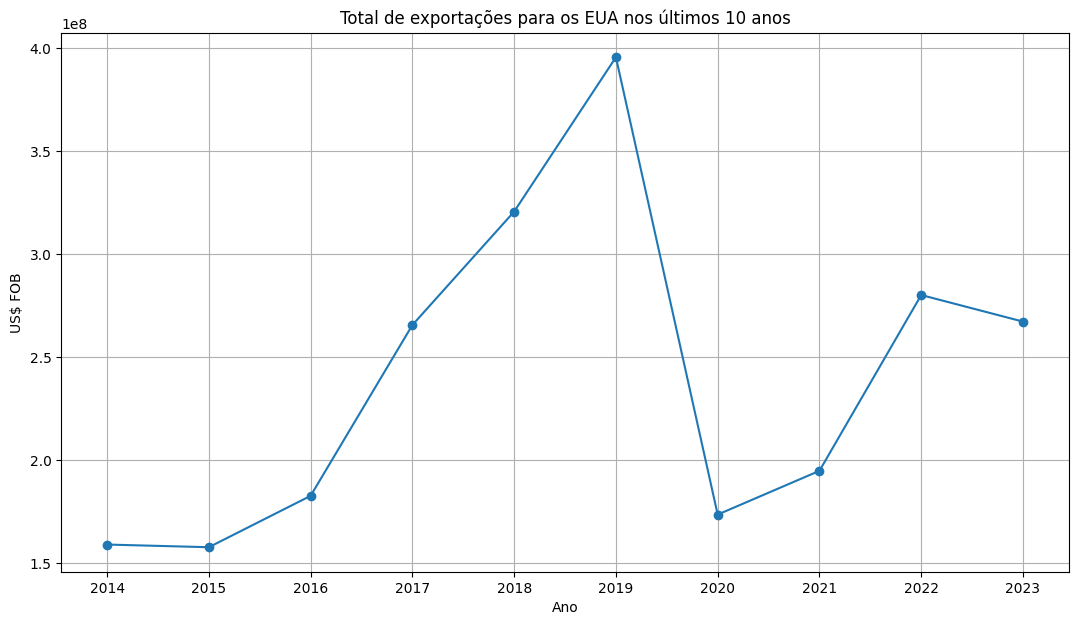

In [ ]:
eee = df[df['País']=='Estados Unidos'].iloc[:,4:].sum().values
eee = list(eee)
eee.reverse()
df_plot = pd.DataFrame({
    'ano': range(2014,2024),
    'exp': eee
})
plt.figure(figsize=(13, 7))
plt.plot('ano',
         'exp',
         data=df_plot,
         linestyle='-',
         marker='o')

plt.grid()
plt.xticks(range(2014,2024), rotation=0, fontsize=10)
plt.xlabel("Ano")
plt.ylabel("US$ FOB")
plt.title("Total de exportações para os EUA nos últimos 10 anos")
plt.show()

In [ ]:
dff

,Mês,País,Código SH2,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,2016 - Valor US$ FOB,2015 - Valor US$ FOB,2014 - Valor US$ FOB
0,Maio,Rússia,27,28294573,18699,0,0,0,0,0,0,0,0
2,Janeiro,Vietnã,85,35897621,58646363,29533369,36619693,55562280,54901114,40897160,26552520,30568014,26247465
3,Janeiro,Rússia,27,0,0,153442,0,0,0,0,0,0,0
4,Março,Vietnã,85,43765586,42524336,35923018,43855632,42853280,46562118,39833895,25777505,53560609,18581477
5,Abril,Vietnã,85,37427403,39770740,31290381,12916239,42866566,50097993,50399397,18962252,45648632,25384093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18714,Maio,Austrália,35,0,0,0,0,0,0,0,0,0,2
18715,Junho,Suíça,48,0,0,0,0,0,0,0,0,0,2
18716,Dezembro,Singapura,48,0,0,0,0,0,0,0,0,0,1
18717,Dezembro,Lituânia,35,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_tt = df_melted.groupby(['País','Ano'])['Valor US$ FOB'].sum().reset_index()
df_tt = df_tt.sort_values(by=['País', 'Ano'])
df_tt = df_tt.dropna(subset=['Valor US$ FOB'])
df_tt

,País,Ano,Valor US$ FOB
0,Afeganistão,2014,0
1,Afeganistão,2015,375
2,Afeganistão,2016,1512
3,Afeganistão,2017,224
4,Afeganistão,2018,6673
...,...,...,...
1725,Índia,2019,42369343
1726,Índia,2020,40165722
1727,Índia,2021,64107511
1728,Índia,2022,77711829


In [ ]:
def pais_dez(pais):
  eee = dff[dff['País']==pais].iloc[:,3:].sum().values
  eee = list(eee)
  eee.reverse()
  df_plot = pd.DataFrame({
      'ano': range(2014,2024),
      'exp': eee
  })
  plt.figure(figsize=(13, 7))
  plt.plot('ano',
          'exp',
          data=df_plot,
          linestyle='-',
          marker='o')

  plt.grid()
  plt.xticks(range(2014,2024), rotation=0, fontsize=10)
  plt.xlabel("Ano")
  plt.ylabel("US$ FOB")
  plt.title("Total de importações dos " + pais + " nos últimos 10 anos")
  plt.show()

In [ ]:
df_tt['variacao'] = df_tt.groupby('País')['Valor US$ FOB'].pct_change() * 100

In [ ]:
def safe_zscore(series):
    if series.std() == 0:
        return np.zeros(len(series))
    else:
        return zscore(series)

df_tt['z-score'] = df_tt.groupby('País')['variacao'].transform(lambda x: safe_zscore(x.fillna(0)))

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [ ]:
threshold = 2.5
df_significativo = df_tt[df_tt['z-score'] >= threshold]

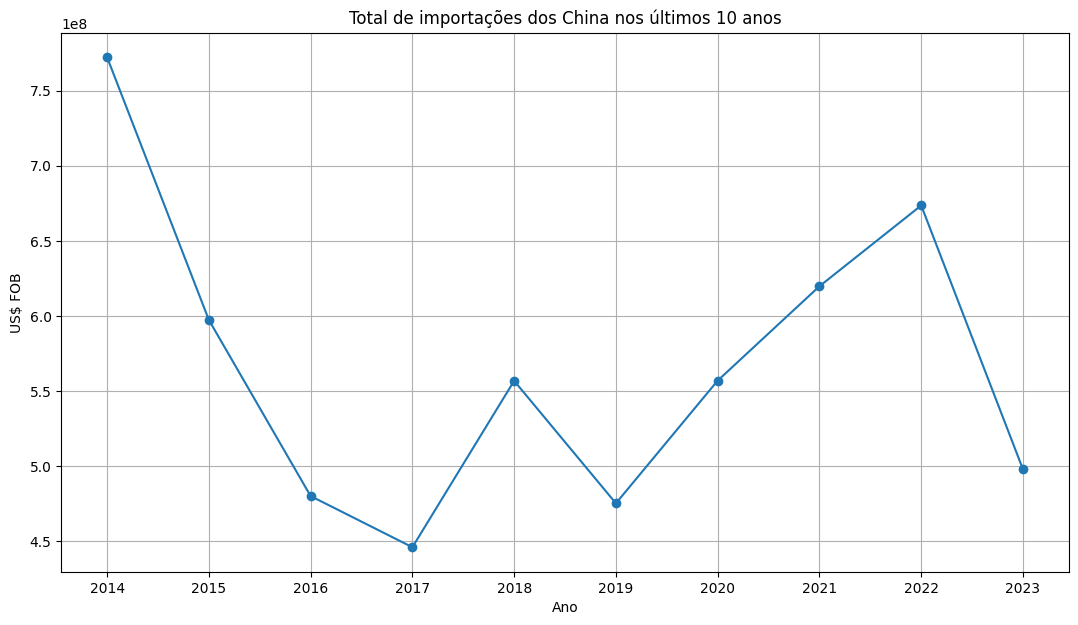

In [ ]:
pais_dez('China')

In [ ]:
df_significativo

,País,Ano,Valor US$ FOB,variacao,z-score
101,Arábia Saudita,2015,804478,169621.097046,2.999683
124,Azerbaijão,2018,483285,188.669677,2.715071
184,Bolívia,2018,274010,7978.125000,2.998610
265,Canadá,2019,17367615,155.929252,2.706734
413,Coreia do Norte,2017,217162,510.417135,2.919340
463,Croácia,2017,7768875,35468.514788,2.977482
535,Emirados Árabes Unidos,2019,761535,29133.589251,2.987685
567,Eslovênia,2021,6094744,83.986551,2.721756
633,Finlândia,2017,4218530,812.570387,2.956691
681,Granada,2015,54783,3114.964789,2.997975


In [ ]:
df_tt

,País,Ano,Valor US$ FOB,variacao,z-score
0,Afeganistão,2014,0,NaN,NaN
1,Afeganistão,2015,375,inf,NaN
2,Afeganistão,2016,1512,303.200000,NaN
3,Afeganistão,2017,224,-85.185185,NaN
4,Afeganistão,2018,6673,2879.017857,NaN
...,...,...,...,...,...
1725,Índia,2019,42369343,8.068212,-0.157422
1726,Índia,2020,40165722,-5.200980,-0.835910
1727,Índia,2021,64107511,59.607516,2.477918
1728,Índia,2022,77711829,21.221098,0.515120


In [ ]:
df_var = df_tt[df_tt['Ano']==2023].dropna(subset=['z-score'])
df_var = df_var[df_var['z-score']!=np.inf]
df_var = df_var.sort_values('z-score', ascending=True).iloc[:10,:]
df_var

,País,Ano,Valor US$ FOB,variacao,z-score
1489,Suécia,2023,6356131,-30.370874,-1.466323
339,China,2023,497909117,-26.083243,-1.371581
599,Estônia,2023,196177,-67.950381,-1.308338
129,Azerbaijão,2023,297216,-63.440313,-1.252323
1009,Malta,2023,330129,-43.576566,-1.198213
1549,Taiwan (Formosa),2023,65053505,-29.421049,-1.094848
1729,Índia,2023,69783431,-10.202305,-1.091641
1019,Malásia,2023,22751473,-40.869839,-1.002115
1309,Polônia,2023,12159371,-48.695503,-0.942917
1649,Uruguai,2023,4298813,-74.030222,-0.739995


# Gráfico Duas Barras

In [ ]:
dff

,Mês,País,Código SH2,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,2016 - Valor US$ FOB,2015 - Valor US$ FOB,2014 - Valor US$ FOB
0,Maio,Rússia,27,28294573,18699,0,0,0,0,0,0,0,0
2,Janeiro,Vietnã,85,35897621,58646363,29533369,36619693,55562280,54901114,40897160,26552520,30568014,26247465
3,Janeiro,Rússia,27,0,0,153442,0,0,0,0,0,0,0
4,Março,Vietnã,85,43765586,42524336,35923018,43855632,42853280,46562118,39833895,25777505,53560609,18581477
5,Abril,Vietnã,85,37427403,39770740,31290381,12916239,42866566,50097993,50399397,18962252,45648632,25384093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18714,Maio,Austrália,35,0,0,0,0,0,0,0,0,0,2
18715,Junho,Suíça,48,0,0,0,0,0,0,0,0,0,2
18716,Dezembro,Singapura,48,0,0,0,0,0,0,0,0,0,1
18717,Dezembro,Lituânia,35,0,0,0,0,0,0,0,0,0,0


In [ ]:
dff[dff['País']=='China'].groupby

In [ ]:
df_china = dff[dff['País']=='China']
df_var2 = df_china[['Código SH2','2023 - Valor US$ FOB','2022 - Valor US$ FOB']].groupby('Código SH2').sum().reset_index()
#df_var2 = df_var2[df_var2['País'].isin(df_var['País'].tolist())]
df_var2 = df_var2.sort_values('2023 - Valor US$ FOB', ascending=False)
#df_var2 = df_var2.set_index('País').reindex(df_var['País'].tolist()).reset_index()
df_var2

,Código SH2,2023 - Valor US$ FOB,2022 - Valor US$ FOB
65,85,200620990,266229776
64,84,96424304,116098622
16,29,87584216,154777406
70,90,27488274,27083116
67,87,17969590,11699433
...,...,...,...
31,46,0,0
30,45,0,0
23,37,0,0
7,14,0,0


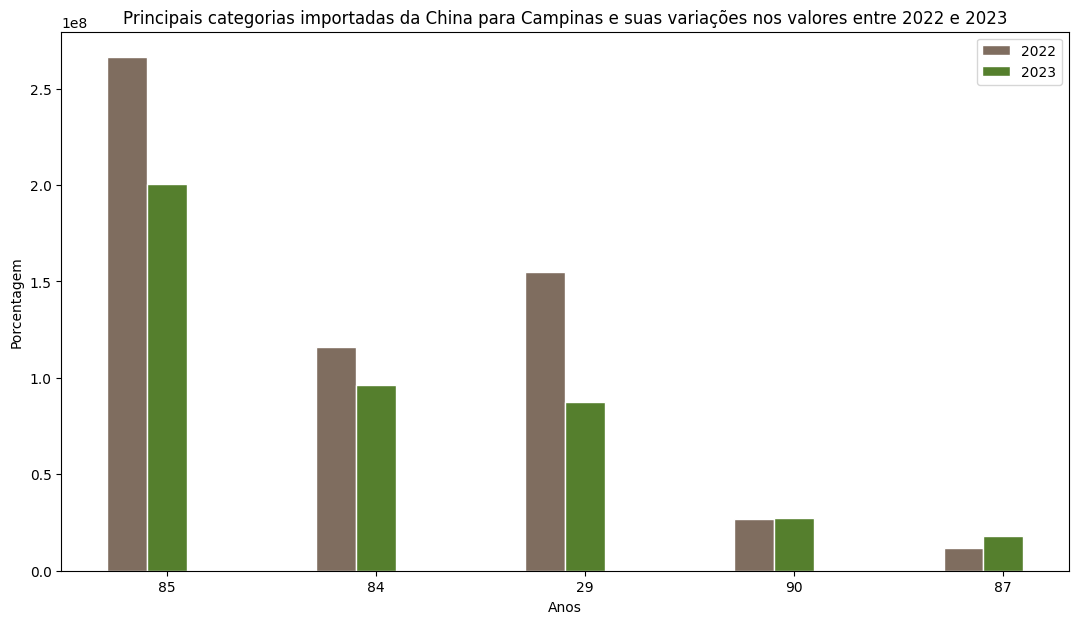

In [ ]:
plt.figure(figsize=(13, 7))

barWidth = 0.19

# set heights of bars
bars1 = df_var2.iloc[:5,:]['2022 - Valor US$ FOB'].tolist()
bars2 = df_var2.iloc[:5,:]['2023 - Valor US$ FOB'].tolist()


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='2022')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='2023')


# Add xticks on the middle of the group bars
plt.title('Principais categorias importadas da China para Campinas e suas variações nos valores entre 2022 e 2023')
plt.xlabel('Anos')
plt.ylabel('Porcentagem')
plt.xticks([r + barWidth for r in range(len(bars1))], df_var2.iloc[:5,:]['Código SH2'].tolist())

# Create legend & Show graphic
plt.legend()
plt.show()

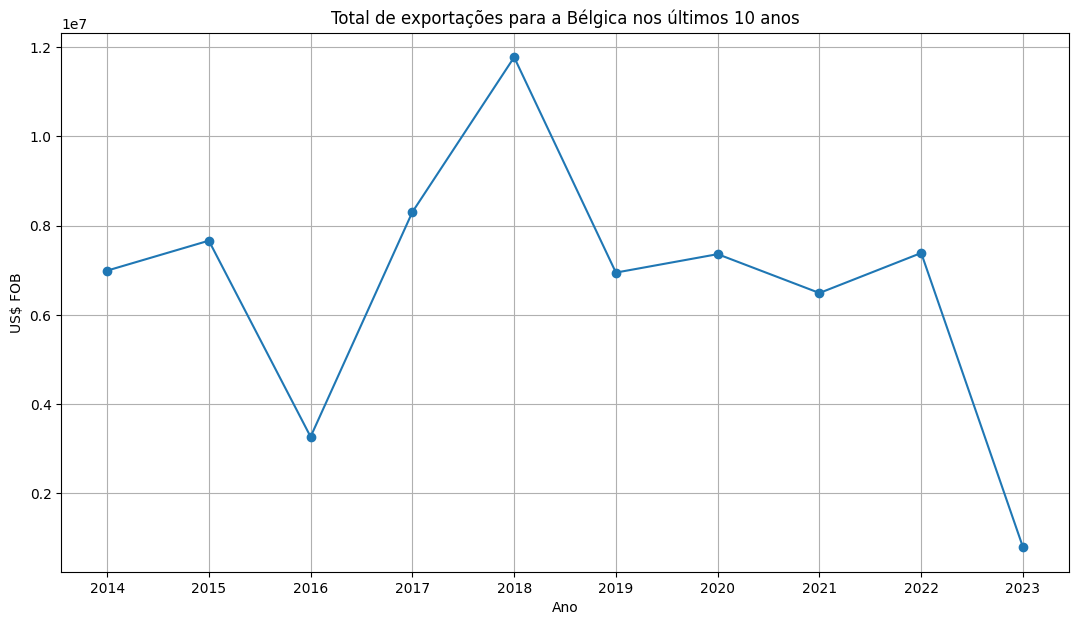

In [ ]:
pais_dez('Bélgica')

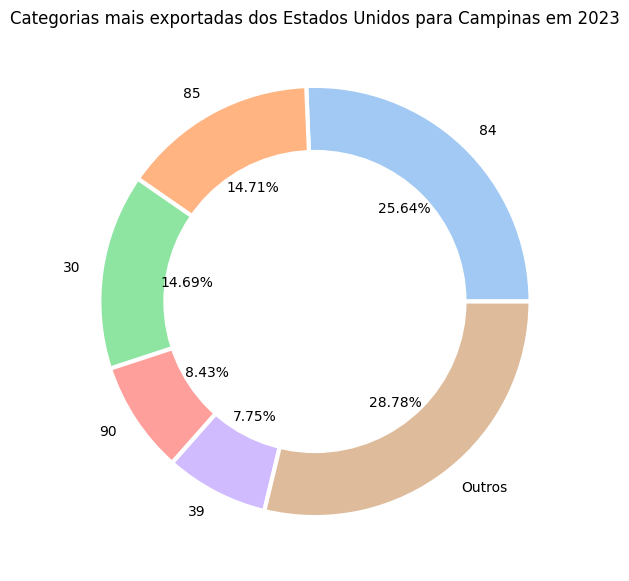

In [ ]:
iraque = dff[dff['País']=='Estados Unidos'][['Código SH2','2023 - Valor US$ FOB']].groupby('Código SH2').sum().reset_index()
iraque = iraque.sort_values('2023 - Valor US$ FOB', ascending=False)
iraque = iraque[iraque['2023 - Valor US$ FOB']!=0]

serie = iraque.iloc[5:,:].sum()
serie['Código SH2'] = 'Outros'
iraque_percent = iraque.iloc[:5,:]
iraque_percent = pd.concat([iraque_percent, serie.to_frame().T], ignore_index=True)
iraque_percent

plt.figure(figsize=(14, 7))
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(iraque_percent['2023 - Valor US$ FOB'],
        labels=iraque_percent['Código SH2'],
        colors=sns.color_palette('pastel')[0:12],
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
        autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Categorias mais exportadas dos Estados Unidos para Campinas em 2023')
# Show the graph
plt.show()

Código SH2              Outros
2023 - Valor US$ FOB         5
dtype: object

In [ ]:
df[df['Código SH2'].isin([30,52])][['País','2020 - Valor US$ FOB']].groupby('País').sum().sort_values('2020 - Valor US$ FOB', ascending=False)

,2020 - Valor US$ FOB
País,
Estados Unidos,29200816
Bangladesh,22193397
China,16391151
Indonésia,15402084
Vietnã,14513068
...,...
Noruega,0
Iraque,0
Itália,0


In [ ]:
df[df['País']=='Brasil']

,Mês,País,Código Seção,Código SH2,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,2016 - Valor US$ FOB,2015 - Valor US$ FOB,2014 - Valor US$ FOB
24,Março,Brasil,V,27,1459738,0,0,0,0,0,0,0,0,0
32,Maio,Brasil,V,27,1711316,0,0,0,0,0,0,0,0,0
93,Janeiro,Brasil,V,27,5636451,0,0,0,0,0,0,0,0,0
1598,Fevereiro,Brasil,V,27,4173767,0,0,0,0,0,0,0,0,0
2748,Dezembro,Brasil,V,27,6183136,28623992,0,0,0,0,0,0,0,0
2777,Julho,Brasil,V,27,3923905,0,0,0,0,0,0,0,0,0
2794,Outubro,Brasil,V,27,3177051,5017152,0,0,0,0,0,0,0,0
2859,Junho,Brasil,V,27,1469296,0,0,0,0,0,0,0,0,0
3333,Abril,Brasil,V,27,169816,0,0,0,32564,0,0,0,0,0


In [ ]:
df_melted

,Mês,Código SH2,País,Ano,Valor US$ FOB
0,Janeiro,52,China,2023,0
1,Março,27,Estados Unidos,2023,8597875
2,Janeiro,85,Estados Unidos,2023,5044342
3,Maio,85,Estados Unidos,2023,4169127
4,Janeiro,27,Estados Unidos,2023,4462166
...,...,...,...,...,...
193235,Fevereiro,45,Egito,2014,1
193236,Janeiro,76,El Salvador,2014,1
193237,Junho,71,Panamá,2014,1
193238,Janeiro,49,China,2014,0


In [ ]:
quadro_sh2 = df_apoio[['Código SH2', 'Descrição SH2']].groupby('Código SH2').first().reset_index()
quadro_sh2

,Código SH2,Descrição SH2
0,1,Animais vivos
1,2,"Carnes e miudezas, comestíveis"
2,3,"Peixes e crustáceos, moluscos e outros inverte..."
3,4,Leite e lacticínios; ovos de aves; mel natural...
4,5,"Outros produtos de origem animal, não especifi..."
...,...,...
86,94,"Móveis; mobiliário médico-cirúrgico, colchões,..."
87,95,"Brinquedos, jogos, artigos para divertimento o..."
88,96,Obras diversas
89,97,"Objetos de arte, de coleção e antiguidades"


In [ ]:
quadro_sh2.to_excel('quadro_sh2.xlsx')

In [ ]:
from scipy.stats import zscore

In [ ]:
maior_cat = df_vc.loc[df_vc.groupby('Código SH2')['2023 - Valor US$ FOB'].idxmax()].reset_index(drop=True)
maior_cat

In [ ]:
print('exp: '+str(df['2023 - Valor US$ FOB'].sum()))
print('imp: '+str(dff['2023 - Valor US$ FOB'].sum()))

exp: 1126629059
imp: 3349591252


In [ ]:
dff

,Mês,Município,País,Código Seção,Descrição Seção,Código SH2,Descrição SH2,2024 - Valor US$ FOB,2023 - Valor US$ FOB,2022 - Valor US$ FOB,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,2016 - Valor US$ FOB,2015 - Valor US$ FOB,2014 - Valor US$ FOB
0,01. Janeiro,Campinas - SP,China,XI,Matérias têxteis e suas obras,52,Algodão,6722257,0,979,895348,2635553,695049,0,0,579027,0,0
1,03. Março,Campinas - SP,Estados Unidos,XVI,"Máquinas e aparelhos, material elétrico e suas...",85,"Máquinas, aparelhos e materiais elétricos, e s...",6712049,2676873,2805172,960914,5692017,6628299,8928416,7068563,10148442,3309045,3945268
2,03. Março,Campinas - SP,Estados Unidos,V,Produtos minerais,27,"Combustíveis minerais, óleos minerais e produt...",5927221,8597875,3614252,2450201,1617857,780478,0,0,0,0,0
3,01. Janeiro,Campinas - SP,Estados Unidos,XVI,"Máquinas e aparelhos, material elétrico e suas...",85,"Máquinas, aparelhos e materiais elétricos, e s...",5536947,5044342,1809316,3060859,2493709,6278481,5782543,3905852,760423,443001,2161946
4,05. Maio,Campinas - SP,Estados Unidos,XVI,"Máquinas e aparelhos, material elétrico e suas...",85,"Máquinas, aparelhos e materiais elétricos, e s...",5125873,4169127,1998259,843573,1177696,9190496,4200663,4526093,6300873,2879738,3655088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19320,02. Fevereiro,Campinas - SP,Egito,IX,"Madeira, carvão vegetal e obras de madeira; Co...",45,Cortiça e suas obras,0,0,0,0,0,0,0,0,0,0,1
19321,01. Janeiro,Campinas - SP,El Salvador,XV,Metais comuns e suas obras,76,Alumínio e suas obras,0,0,0,0,0,0,0,0,0,0,1
19322,06. Junho,Campinas - SP,Panamá,XIV,"Pérolas naturais ou cultivadas, pedras precios...",71,"Pérolas naturais ou cultivadas, pedras precios...",0,0,0,0,0,0,0,0,0,0,1
19323,01. Janeiro,Campinas - SP,China,X,Pastas de madeira ou de outras matérias fibros...,49,"Livros, jornais, gravuras e outros produtos da...",0,0,0,0,0,0,0,0,0,0,0


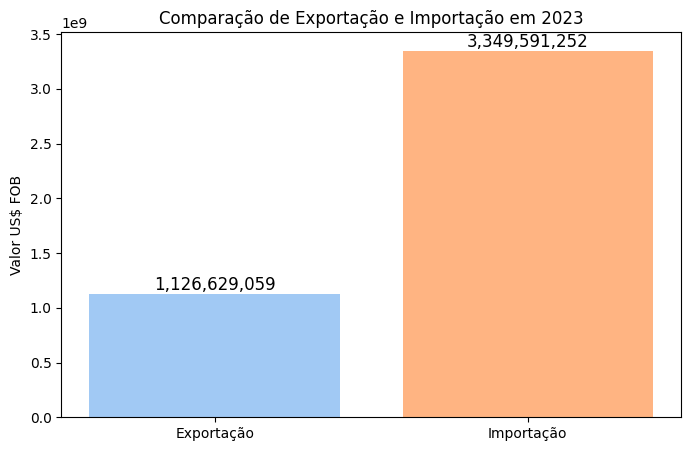

In [ ]:
a = df['2023 - Valor US$ FOB'].sum()
b = dff['2023 - Valor US$ FOB'].sum()

labels = ['Exportação', 'Importação']
values = [a, b]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=sns.color_palette("pastel"))

# Adicionar os valores nas barras
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5000, f'{value:,}', ha='center', va='bottom', fontsize=12)

plt.ylabel('Valor US$ FOB')
plt.title('Comparação de Exportação e Importação em 2023')
plt.show()

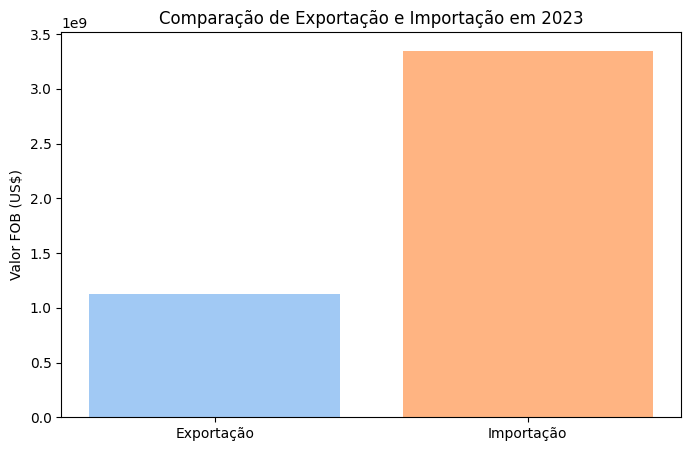

In [ ]:
a = df['2023 - Valor US$ FOB'].sum()
b = dff['2023 - Valor US$ FOB'].sum()

labels = ['Exportação', 'Importação']
values = [a, b]

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=sns.color_palette("pastel"))
plt.ylabel('Valor FOB (US$)')
plt.title('Comparação de Exportação e Importação em 2023')
plt.show()